# Bird Species Audio Classification Project

## Introduction

This project builds a machine learning model to identify different bird species from their audio recordings. We will analyze bird sounds and create a classifier that can automatically recognize which bird is singing.

### What We'll Do:
- **Load and explore** bird audio data from Xeno-canto database
- **Process audio files** to extract important features
- **Build machine learning models** to classify bird species
- **Test and evaluate** how well our model works

### Dataset:
- Audio recordings of 30 different bird species (A-M alphabetically)
- Each recording is labeled with the correct bird species
- Files are in MP3 format with metadata in CSV file

### Models & Techniques Used:
- **Convolutional Neural Networks (CNN)** - Custom deep learning model for audio pattern recognition
- **YAMNet Classifier** - Google's pre-trained audio classification model
- **Mel-frequency spectrograms** - Convert audio to visual representations
- **Transfer learning** - Use pre-trained models for better performance



---

In [1]:
# Step 1: Initial Setup and Data Exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import Counter
import warnings
warnings.filterwarnings('ignore')



# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("=== BIRD SPECIES AUDIO CLASSIFICATION PROJECT ===")
print("Step 1: Initial Setup and Data Exploration\n")

# Load the metadata CSV
print("Loading train_extended.csv...")
df = pd.read_csv('dataset/raw/train_extended.csv')

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n" + "="*50)

# Display basic info about the dataset
print("\nDATASET OVERVIEW:")
print("="*50)
df.info()

print("\nFIRST FEW ROWS:")
print("="*50)
print(df.head())

print("\nBASIC STATISTICS:")
print("="*50)
print(df.describe())

# Check for missing values
print("\nMISSING VALUES:")
print("="*50)
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])

# Explore unique species (ebird_code)
print(f"\nSPECIES INFORMATION:")
print("="*50)
print(f"Total unique species: {df['ebird_code'].nunique()}")
print(f"Species list: {sorted(df['ebird_code'].unique())}")

# Check rating distribution
print(f"\nRATING DISTRIBUTION:")
print("="*50)
rating_counts = df['rating'].value_counts().sort_index()
print(rating_counts)

# Check duration statistics
print(f"\nDURATION STATISTICS:")
print("="*50)
print(f"Min duration: {df['duration'].min():.2f}s")
print(f"Max duration: {df['duration'].max():.2f}s")
print(f"Mean duration: {df['duration'].mean():.2f}s")
print(f"Median duration: {df['duration'].median():.2f}s")


=== BIRD SPECIES AUDIO CLASSIFICATION PROJECT ===
Step 1: Initial Setup and Data Exploration

Loading train_extended.csv...
Dataset loaded successfully!
Shape: (23784, 29)
Columns: ['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'duration', 'filename', 'species', 'title', 'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude', 'sampling_rate', 'type', 'elevation', 'bitrate_of_mp3', 'file_type', 'background', 'xc_id', 'url', 'country', 'author', 'primary_label', 'longitude', 'time', 'recordist', 'license']


DATASET OVERVIEW:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23784 entries, 0 to 23783
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            23784 non-null  float64
 1   playback_used     21938 non-null  object 
 2   ebird_code        23784 non-null  object 
 3   channels          23784 non-null  object 
 4   date              23784 non-null  object 
 5  

## Step 1: Initial Setup and Data Exploration

### What We're Doing:
- Loading the bird audio dataset
- Exploring the data structure and basic statistics
- Understanding what information we have about each bird recording

### Key Libraries:
- **pandas** - For data handling and analysis
- **numpy** - For numerical operations
- **matplotlib & seaborn** - For creating charts and visualizations
- **os** - For file operations

### What to Expect:
- Dataset contains **23,784 bird recordings** from **30 species**
- Each recording has **29 features** including species name, duration, location, etc.
- Audio files range from very short clips to long recordings (up to 59 minutes!)
- Most recordings are around **31 seconds** long (median duration)

---

=== STEP 2: DATA VISUALIZATION & CONFIGURATION ===

CURRENT CONFIGURATION:
MIN_RATING_THRESHOLD: 3.0
MAX_DURATION: 20
MIN_DURATION: 1
MIN_SAMPLES_PER_CLASS: 100

DATA ANALYSIS BEFORE FILTERING:

SPECIES STATISTICS:
Total species: 153
value counts:  ebird_code
redcro     1772
houspa     1216
houwre      984
comrav      889
eursta      694
           ... 
rinduc        1
buffle        1
swahaw        1
norhar2       1
bkchum        1
Name: count, Length: 259, dtype: int64
value counts sorted:  ebird_code
aldfly    131
ameavo      9
amebit      6
amecro    147
amegfi     88
         ... 
yebsap      4
yehbla     25
yelwar     37
yerwar     88
yetvir     12
Name: count, Length: 259, dtype: int64
value counts sorted am:  ebird_code
aldfly    131
ameavo      9
amebit      6
amecro    147
amegfi     88
         ... 
marwre    240
merlin      7
moublu      4
mouchi    100
moudov     29
Name: count, Length: 153, dtype: int64
filter data with top 153:  ebird_code
aldfly    131
ameavo      9
ameb

,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
0,0.0,no,aldfly,2 (stereo),2019-06-11,49,XC554809.mp3,Alder Flycatcher,XC554809 Alder Flycatcher (Empidonax alnorum),[],...,NaN,554809,https://www.xeno-canto.org/554809,United States,Ron Overholtz,Empidonax alnorum_Alder Flycatcher,-149.9757,07:00,Ron Overholtz,Creative Commons Attribution-NonCommercial-Sha...
1,0.0,no,aldfly,2 (stereo),2020-04-14,21,XC552408.mp3,Alder Flycatcher,XC552408 Alder Flycatcher (Empidonax alnorum),[],...,NaN,552408,https://www.xeno-canto.org/552408,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,17:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
2,0.0,yes,aldfly,2 (stereo),2020-04-05,35,XC544552.mp3,Alder Flycatcher,XC544552 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544552,https://www.xeno-canto.org/544552,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
3,0.0,yes,aldfly,2 (stereo),2020-04-05,12,XC544551.mp3,Alder Flycatcher,XC544551 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544551,https://www.xeno-canto.org/544551,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
4,0.0,yes,aldfly,2 (stereo),2020-04-05,38,XC544550.mp3,Alder Flycatcher,XC544550 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544550,https://www.xeno-canto.org/544550,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14680,3.5,no,moudov,2 (stereo),2020-03-14,50,XC534461.mp3,Mourning Dove,XC534461 Mourning Dove (Zenaida macroura),['Haemorhous mexicanus_House Finch'],...,House Finch (Haemorhous mexicanus),534461,https://www.xeno-canto.org/534461,Mexico,Manuel Grosselet,Zenaida macroura_Mourning Dove,-109.0686,07:30,Manuel Grosselet,Creative Commons Attribution-NonCommercial-Sha...
14681,3.0,no,moudov,2 (stereo),2020-06-13,5,XC567994.mp3,Mourning Dove,XC567994 Mourning Dove (Zenaida macroura),[],...,NaN,567994,https://www.xeno-canto.org/567994,United States,Michael Hurben,Zenaida macroura_Mourning Dove,-93.3740,08:00,Michael Hurben,Creative Commons Attribution-NonCommercial-Sha...
14682,2.5,NaN,moudov,1 (mono),2020-01-22,40,XC522348.mp3,Mourning Dove,XC522348 Mourning Dove (Zenaida macroura),"['Quiscalus mexicanus_Great-tailed Grackle', '...",...,Great-tailed Grackle (Quiscalus mexicanus); Go...,522348,https://www.xeno-canto.org/522348,Honduras,Mario Reyes Jr,Zenaida macroura_Mourning Dove,-87.6545,06:30,Mario Reyes Jr,Creative Commons Attribution-NonCommercial-Sha...
14683,1.5,no,moudov,2 (stereo),2016-07-04,56,XC326248.mp3,Mourning Dove,XC326248 Mourning Dove (Zenaida macroura),"['Mimus polyglottos_Northern Mockingbird', 'Ha...",...,Northern Mockingbird (Mimus polyglottos); Hous...,326248,https://www.xeno-canto.org/326248,United States,Nick Komar,Zenaida macroura_Mourning Dove,-110.7209,12:00,Nick Komar,Creative Commons Attribution-NonCommercial-Sha...


filter data with atleast 100 samples in 153: 
number of species  with 100 samples:  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
0,0.0,no,aldfly,2 (stereo),2019-06-11,49,XC554809.mp3,Alder Flycatcher,XC554809 Alder Flycatcher (Empidonax alnorum),[],...,NaN,554809,https://www.xeno-canto.org/554809,United States,Ron Overholtz,Empidonax alnorum_Alder Flycatcher,-149.9757,07:00,Ron Overholtz,Creative Commons Attribution-NonCommercial-Sha...
1,0.0,no,aldfly,2 (stereo),2020-04-14,21,XC552408.mp3,Alder Flycatcher,XC552408 Alder Flycatcher (Empidonax alnorum),[],...,NaN,552408,https://www.xeno-canto.org/552408,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,17:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
2,0.0,yes,aldfly,2 (stereo),2020-04-05,35,XC544552.mp3,Alder Flycatcher,XC544552 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544552,https://www.xeno-canto.org/544552,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
3,0.0,yes,aldfly,2 (stereo),2020-04-05,12,XC544551.mp3,Alder Flycatcher,XC544551 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544551,https://www.xeno-canto.org/544551,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
4,0.0,yes,aldfly,2 (stereo),2020-04-05,38,XC544550.mp3,Alder Flycatcher,XC544550 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544550,https://www.xeno-canto.org/544550,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14540,1.5,no,marwre,2 (stereo),2012-07-12,123,XC135636.mp3,Marsh Wren,XC135636 Marsh Wren (Cistothorus palustris),['Turdus migratorius_American Robin'],...,American Robin (Turdus migratorius),135636,https://www.xeno-canto.org/135636,United States,Daniel Parker,Cistothorus palustris_Marsh Wren,-73.8861,16:03,Daniel Parker,Creative Commons Attribution-NonCommercial-Sha...
14541,1.0,no,marwre,2 (stereo),2014-03-08,9,XC286828.mp3,Marsh Wren,XC286828 Marsh Wren (Cistothorus palustris),[],...,NaN,286828,https://www.xeno-canto.org/286828,United States,Elisa Yang,Cistothorus palustris_Marsh Wren,-117.2728,04:00,Elisa Yang,Creative Commons Attribution-NonCommercial-Sha...
14542,0.5,no,marwre,2 (stereo),2015-04-19,46,XC264256.mp3,Marsh Wren,XC264256 Marsh Wren (Cistothorus palustris),"['Thryothorus ludovicianus_Carolina Wren', 'Ca...",...,Carolina Wren (Thryothorus ludovicianus); Nort...,264256,https://www.xeno-canto.org/264256,United States,Terry Davis,Cistothorus palustris_Marsh Wren,-93.5537,13:58,Terry Davis,Creative Commons Attribution-NonCommercial-Sha...
14543,1.0,no,marwre,1 (mono),2013-06-02,1,XC148927.mp3,Marsh Wren,XC148927 Marsh Wren (Cistothorus palustris),[],...,NaN,148927,https://www.xeno-canto.org/148927,Canada,Dugan Maynard,Cistothorus palustris_Marsh Wren,-111.3803,06:00,Dugan Maynard,Creative Commons Attribution-NonCommercial-Sha...


updated species value counts sorted a to m:  ebird_code
houspa     1216
houwre      984
comrav      889
eursta      694
barswa      608
amerob      407
mallar3     407
carwre      371
bewwre      363
eucdov      318
comyel      307
daejun      257
marwre      240
blujay      239
grycat      235
comter      224
amered      198
grhowl      194
bkcchi      188
houfin      187
gnwtea      185
comred      179
herthr      177
chispa      165
eastow      163
easmea      154
cangoo      154
amecro      147
horlar      145
aldfly      131
brncre      128
buggna      128
grtgra      126
lesgol      123
bulori      114
astfly      110
bkhgro      110
bnhcow      105
indbun      105
Name: count, dtype: int64

APPLYING FILTERS:
number of species  with duration < 20:  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
3,0.0,yes,aldfly,2 (stereo),2020-04-05,12,XC544551.mp3,Alder Flycatcher,XC544551 Alder Flycatcher (Empidonax alnorum),[],...,NaN,544551,https://www.xeno-canto.org/544551,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,07:00,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
6,0.0,no,aldfly,2 (stereo),2020-04-04,18,XC541879.mp3,Alder Flycatcher,XC541879 Alder Flycatcher (Empidonax alnorum),[],...,NaN,541879,https://www.xeno-canto.org/541879,Colombia,Jerome Fischer,Empidonax alnorum_Alder Flycatcher,-74.6520,17:30,Jerome Fischer,Creative Commons Attribution-NonCommercial-Sha...
7,5.0,no,aldfly,2 (stereo),2019-06-09,11,XC550421.mp3,Alder Flycatcher,XC550421 Alder Flycatcher (Empidonax alnorum),[],...,NaN,550421,https://www.xeno-canto.org/550421,Canada,Martin St-Michel,Empidonax alnorum_Alder Flycatcher,-74.2627,07:26,Martin St-Michel,Creative Commons Attribution-NonCommercial-Sha...
11,4.0,no,aldfly,1 (mono),2019-07-26,19,XC524515.mp3,Alder Flycatcher,XC524515 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524515,https://www.xeno-canto.org/524515,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
12,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524514.mp3,Alder Flycatcher,XC524514 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524514,https://www.xeno-canto.org/524514,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14534,1.5,no,marwre,1 (mono),2015-11-24,13,XC292586.mp3,Marsh Wren,XC292586 Marsh Wren (Cistothorus palustris),['Regulus calendula_Ruby-crowned Kinglet'],...,Ruby-crowned Kinglet (Regulus calendula),292586,https://www.xeno-canto.org/292586,United States,Ken Blankenship,Cistothorus palustris_Marsh Wren,-104.4688,08:00,Ken Blankenship,Creative Commons Attribution-NonCommercial-Sha...
14535,2.0,no,marwre,2 (stereo),2015-11-05,3,XC288793.mp3,Marsh Wren,XC288793 Marsh Wren (Cistothorus palustris),[],...,NaN,288793,https://www.xeno-canto.org/288793,United States,Pat Goltz,Cistothorus palustris_Marsh Wren,-111.0210,16:30,Pat Goltz,Creative Commons Attribution-NonCommercial-Sha...
14538,1.5,no,marwre,1 (mono),2013-06-01,8,XC147927.mp3,Marsh Wren,XC147927 Marsh Wren (Cistothorus palustris),"['Spizella passerina_Chipping Sparrow', 'Zonot...",...,Chipping Sparrow (Spizella passerina); White-t...,147927,https://www.xeno-canto.org/147927,Canada,Dugan Maynard,Cistothorus palustris_Marsh Wren,-111.3803,04:00,Dugan Maynard,Creative Commons Attribution-NonCommercial-Sha...
14541,1.0,no,marwre,2 (stereo),2014-03-08,9,XC286828.mp3,Marsh Wren,XC286828 Marsh Wren (Cistothorus palustris),[],...,NaN,286828,https://www.xeno-canto.org/286828,United States,Elisa Yang,Cistothorus palustris_Marsh Wren,-117.2728,04:00,Elisa Yang,Creative Commons Attribution-NonCommercial-Sha...


number of species  with rating > 3:  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
7,5.0,no,aldfly,2 (stereo),2019-06-09,11,XC550421.mp3,Alder Flycatcher,XC550421 Alder Flycatcher (Empidonax alnorum),[],...,NaN,550421,https://www.xeno-canto.org/550421,Canada,Martin St-Michel,Empidonax alnorum_Alder Flycatcher,-74.2627,07:26,Martin St-Michel,Creative Commons Attribution-NonCommercial-Sha...
11,4.0,no,aldfly,1 (mono),2019-07-26,19,XC524515.mp3,Alder Flycatcher,XC524515 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524515,https://www.xeno-canto.org/524515,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
12,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524514.mp3,Alder Flycatcher,XC524514 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524514,https://www.xeno-canto.org/524514,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
13,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524513.mp3,Alder Flycatcher,XC524513 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524513,https://www.xeno-canto.org/524513,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
168,5.0,no,amecro,1 (mono),2020-06-29,5,XC572379.mp3,American Crow,XC572379 American Crow (Corvus brachyrhynchos),[],...,NaN,572379,https://www.xeno-canto.org/572379,United States,Brian Hendrix,Corvus brachyrhynchos_American Crow,-87.1450,06:00,Brian Hendrix,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,4.0,NaN,marwre,1 (mono),2012-09-02,12,XC141876.mp3,Marsh Wren,XC141876 Marsh Wren (Cistothorus palustris),[],...,NaN,141876,https://www.xeno-canto.org/141876,Canada,Ian Cruickshank,Cistothorus palustris_Marsh Wren,-123.3728,11:00,Ian Cruickshank,Creative Commons Attribution-NonCommercial-Sha...
14473,3.5,no,marwre,2 (stereo),2013-04-14,18,XC130798.mp3,Marsh Wren,XC130798 Marsh Wren (Cistothorus palustris),['Setophaga discolor_Prairie Warbler'],...,Prairie Warbler (Setophaga discolor),130798,https://www.xeno-canto.org/130798,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14476,3.5,no,marwre,2 (stereo),2013-04-03,12,XC130794.mp3,Marsh Wren,XC130794 Marsh Wren (Cistothorus palustris),['Agelaius phoeniceus_Red-winged Blackbird'],...,Red-winged Blackbird (Agelaius phoeniceus),130794,https://www.xeno-canto.org/130794,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14479,3.5,no,marwre,2 (stereo),2013-04-03,16,XC130789.mp3,Marsh Wren,XC130789 Marsh Wren (Cistothorus palustris),"['Agelaius phoeniceus_Red-winged Blackbird', '...",...,Red-winged Blackbird (Agelaius phoeniceus); Fi...,130789,https://www.xeno-canto.org/130789,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


Remaining rows after removing missing/empty URLs: 2212
number of species  that contain url data  39


,rating,playback_used,ebird_code,channels,date,duration,filename,species,title,secondary_labels,...,background,xc_id,url,country,author,primary_label,longitude,time,recordist,license
7,5.0,no,aldfly,2 (stereo),2019-06-09,11,XC550421.mp3,Alder Flycatcher,XC550421 Alder Flycatcher (Empidonax alnorum),[],...,NaN,550421,https://www.xeno-canto.org/550421,Canada,Martin St-Michel,Empidonax alnorum_Alder Flycatcher,-74.2627,07:26,Martin St-Michel,Creative Commons Attribution-NonCommercial-Sha...
11,4.0,no,aldfly,1 (mono),2019-07-26,19,XC524515.mp3,Alder Flycatcher,XC524515 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524515,https://www.xeno-canto.org/524515,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
12,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524514.mp3,Alder Flycatcher,XC524514 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524514,https://www.xeno-canto.org/524514,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
13,4.0,no,aldfly,1 (mono),2019-07-26,16,XC524513.mp3,Alder Flycatcher,XC524513 Alder Flycatcher (Empidonax alnorum),[],...,NaN,524513,https://www.xeno-canto.org/524513,Canada,Long Benjamin,Empidonax alnorum_Alder Flycatcher,-73.3631,06:55,Long Benjamin,Creative Commons Attribution-NonCommercial-Sha...
168,5.0,no,amecro,1 (mono),2020-06-29,5,XC572379.mp3,American Crow,XC572379 American Crow (Corvus brachyrhynchos),[],...,NaN,572379,https://www.xeno-canto.org/572379,United States,Brian Hendrix,Corvus brachyrhynchos_American Crow,-87.1450,06:00,Brian Hendrix,Creative Commons Attribution-NonCommercial-Sha...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14463,4.0,NaN,marwre,1 (mono),2012-09-02,12,XC141876.mp3,Marsh Wren,XC141876 Marsh Wren (Cistothorus palustris),[],...,NaN,141876,https://www.xeno-canto.org/141876,Canada,Ian Cruickshank,Cistothorus palustris_Marsh Wren,-123.3728,11:00,Ian Cruickshank,Creative Commons Attribution-NonCommercial-Sha...
14473,3.5,no,marwre,2 (stereo),2013-04-14,18,XC130798.mp3,Marsh Wren,XC130798 Marsh Wren (Cistothorus palustris),['Setophaga discolor_Prairie Warbler'],...,Prairie Warbler (Setophaga discolor),130798,https://www.xeno-canto.org/130798,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14476,3.5,no,marwre,2 (stereo),2013-04-03,12,XC130794.mp3,Marsh Wren,XC130794 Marsh Wren (Cistothorus palustris),['Agelaius phoeniceus_Red-winged Blackbird'],...,Red-winged Blackbird (Agelaius phoeniceus),130794,https://www.xeno-canto.org/130794,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
14479,3.5,no,marwre,2 (stereo),2013-04-03,16,XC130789.mp3,Marsh Wren,XC130789 Marsh Wren (Cistothorus palustris),"['Agelaius phoeniceus_Red-winged Blackbird', '...",...,Red-winged Blackbird (Agelaius phoeniceus); Fi...,130789,https://www.xeno-canto.org/130789,United States,Mike Nelson,Cistothorus palustris_Marsh Wren,-82.7557,08:00,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...


number of species COUNTS  ebird_code
comrav     217
houwre     214
houspa     190
mallar3    163
barswa     157
eursta     137
eucdov     107
comter      83
carwre      80
bewwre      75
blujay      62
amerob      55
comyel      53
gnwtea      45
cangoo      41
comred      40
horlar      40
daejun      39
grycat      35
houfin      34
marwre      33
amecro      33
bnhcow      29
chispa      29
eastow      27
grtgra      26
easmea      25
amered      19
grhowl      18
herthr      18
buggna      18
lesgol      15
astfly      10
indbun      10
brncre       9
bkhgro       9
bkcchi       8
bulori       5
aldfly       4
Name: count, dtype: int64

 Next step: Audio file validation and path checking


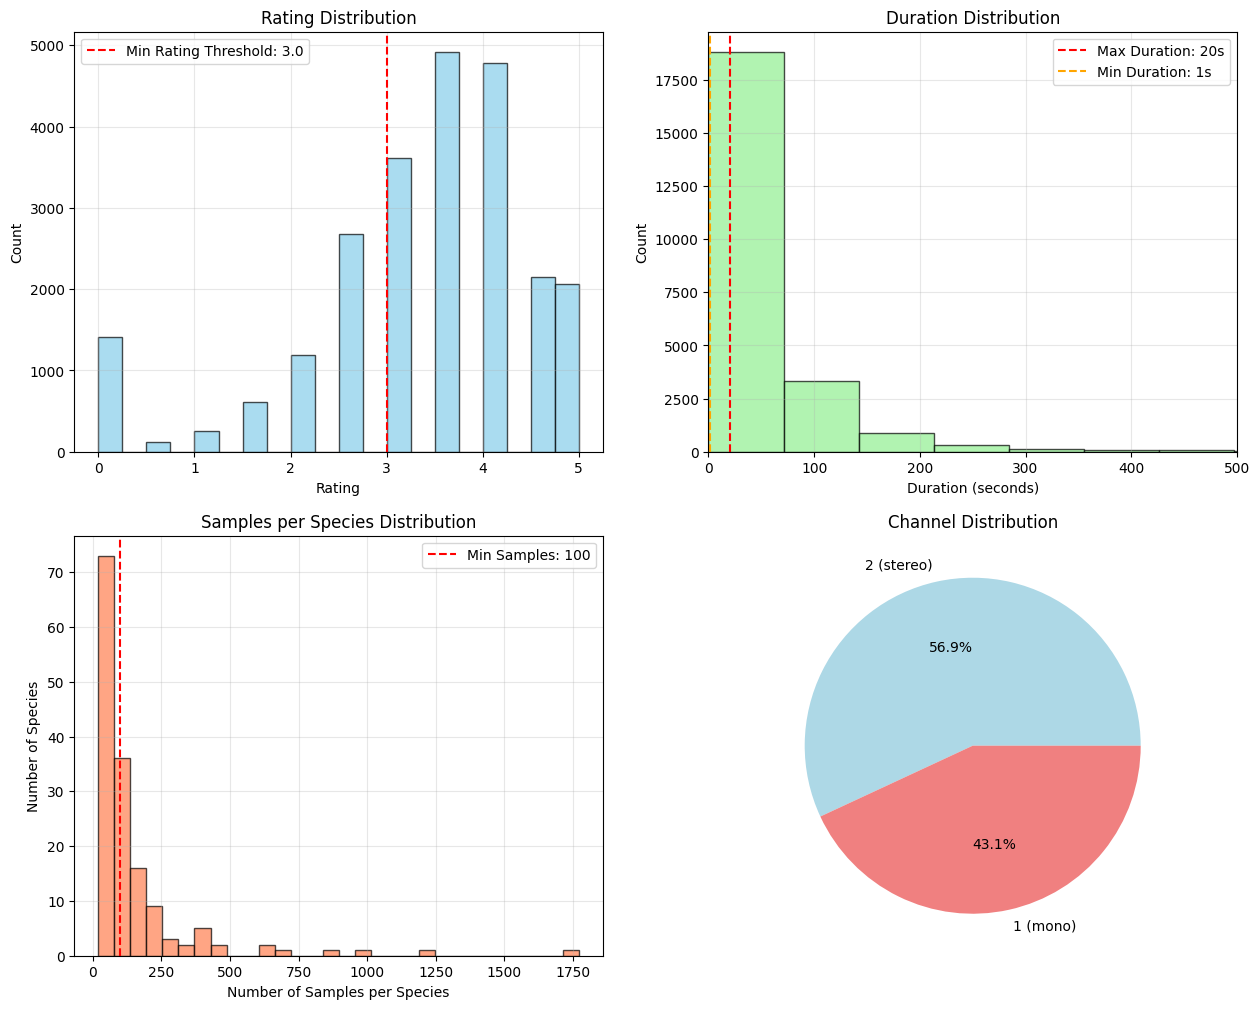

In [2]:
# Step 2: Data Visualization and Configuration Setup
import matplotlib.pyplot as plt
import seaborn as sns

print("=== STEP 2: DATA VISUALIZATION & CONFIGURATION ===\n")

# ========================================
# CONFIGURATION PARAMETERS (EASILY ADJUSTABLE)
# ========================================
CONFIG = {
    'MIN_RATING_THRESHOLD': 3.0,      # Filter recordings below this rating #crystal
    #'NUM_CLASSES': 30,                # Number of bird species to use (3, 5, 30, or custom) this value should be calculated #crystal
    'MAX_DURATION': 20,              # Maximum duration in seconds (20 seconds) #crystal
    'MIN_DURATION': 1,                # Minimum duration in seconds, if its 0 then theres nothing #crystal
    'MIN_SAMPLES_PER_CLASS': 100,      # Minimum samples needed per species #crystal
}

print("CURRENT CONFIGURATION:")
print("="*50)
for key, value in CONFIG.items():
    print(f"{key}: {value}")

print(f"\n{'='*50}")
print("DATA ANALYSIS BEFORE FILTERING:")
print("="*50)

# 1. Rating Distribution Visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Rating distribution
axes[0,0].hist(df['rating'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(CONFIG['MIN_RATING_THRESHOLD'], color='red', linestyle='--',
                 label=f'Min Rating Threshold: {CONFIG["MIN_RATING_THRESHOLD"]}')
axes[0,0].set_xlabel('Rating')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Rating Distribution')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Duration distribution
axes[0,1].hist(df['duration'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,1].axvline(CONFIG['MAX_DURATION'], color='red', linestyle='--',
                 label=f'Max Duration: {CONFIG["MAX_DURATION"]}s')
axes[0,1].axvline(CONFIG['MIN_DURATION'], color='orange', linestyle='--',
                 label=f'Min Duration: {CONFIG["MIN_DURATION"]}s')
axes[0,1].set_xlabel('Duration (seconds)')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Duration Distribution')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_xlim(0, 500)  # Focus on reasonable duration range

# Species count distribution
species_counts = df['ebird_code'].value_counts().head(153) #crystal

axes[1,0].hist(species_counts.values, bins=30, alpha=0.7, color='coral', edgecolor='black')
axes[1,0].axvline(CONFIG['MIN_SAMPLES_PER_CLASS'], color='red', linestyle='--',
                 label=f'Min Samples: {CONFIG["MIN_SAMPLES_PER_CLASS"]}')
axes[1,0].set_xlabel('Number of Samples per Species')
axes[1,0].set_ylabel('Number of Species')
axes[1,0].set_title('Samples per Species Distribution')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Channel distribution
channel_counts = df['channels'].value_counts()
axes[1,1].pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%',
             colors=['lightblue', 'lightcoral'])
axes[1,1].set_title('Channel Distribution')

#plt.tight_layout()
#plt.show()

# 2. Detailed Species Analysis
print(f"\nSPECIES STATISTICS:")
print("="*50)
print(f"Total species: {species_counts.shape[0]}")

# Filter the original DataFrame to keep only those species
# Get the top 153 ebird_codes
# Step 1: Get value counts (i.e., frequency) of unique values
value_counts = df['ebird_code'].value_counts()

print("value counts: ", value_counts)

# Step 2: Sort the index (unique values) alphabetically
value_counts_sorted = value_counts.sort_index()

print("value counts sorted: ", value_counts_sorted)

top_153_unique = value_counts_sorted[:153]

print("value counts sorted am: ", top_153_unique)


# Step 2: Filter to keep only ebird_codes with at least 100 occurrences
valid_codes = value_counts[value_counts > CONFIG['MIN_SAMPLES_PER_CLASS']].index

# Step 5: Get all rows from the original df with those top ebird_codes
filtered_df = df[df['ebird_code'].isin(top_153_unique.index)]


print("filter data with top 153: ", top_153_unique)
display(filtered_df)


print("filter data with atleast 100 samples in 153: ")
# Step 5: Get all rows from the original df with those top ebird_codes
filtered_df = filtered_df[filtered_df['ebird_code'].isin(valid_codes)]
species_counts = filtered_df ['ebird_code'].value_counts()
print(f"number of species  with 100 samples: ", species_counts.shape[0])
display(filtered_df)

updatedvalue_counts = filtered_df['ebird_code'].value_counts()
print("updated species value counts sorted a to m: ", updatedvalue_counts)



# 3. Apply Filters and Show Impact
print(f"\n{'='*50}")
print("APPLYING FILTERS:")
print("="*50)

# Filter by duration
filtered_df = filtered_df[filtered_df['duration'] < 20]
species_counts = filtered_df ['ebird_code'].value_counts()
print(f"number of species  with duration < 20: ", species_counts.shape[0])
display(filtered_df)

# Filter by rating
filtered_df = filtered_df[filtered_df['rating'] > 3]
species_counts = filtered_df['ebird_code'].value_counts()
print(f"number of species  with rating > 3: ", species_counts.shape[0])
display(filtered_df)

# Remove rows where 'url' is missing or empty
filtered_df = filtered_df[filtered_df['url'].notna() & (filtered_df['url'].str.strip() != '')]

print(f"Remaining rows after removing missing/empty URLs: {len(filtered_df)}")
print(f"number of species  that contain url data ", species_counts.shape[0])
display(filtered_df)

print(f"number of species COUNTS ", species_counts)

# # 4. Select Top N Classes
# print(f"\n{'='*50}")
# print(f"SELECTING TOP {CONFIG['NUM_CLASSES']} CLASSES:")
# print("="*50)

# Get top N species by sample count (after filtering)
#final_species_counts = df_filtered['ebird_code'].value_counts().head(153) #crystal
# if CONFIG['NUM_CLASSES'] <= len(final_species_counts):
#     selected_species = final_species_counts.head(CONFIG['NUM_CLASSES']).index.tolist()
#     df_final = df_filtered[df_filtered['ebird_code'].isin(selected_species)].copy()

#     print(f"Selected {len(selected_species)} species:")
#     for i, species in enumerate(selected_species, 1):
#         count = final_species_counts[species]
#         print(f"{i:2d}. {species}: {count:3d} samples")

#     print(f"\nFinal dataset: {len(df_final):,} samples across {len(selected_species)} species")

#     # Class balance visualization
#     plt.figure(figsize=(12, 6))
#     final_counts = df_final['ebird_code'].value_counts()
#     plt.bar(range(len(final_counts)), final_counts.values, color='steelblue', alpha=0.7)
#     plt.xlabel('Species (ordered by sample count)')
#     plt.ylabel('Number of Samples')
#     plt.title(f'Class Distribution - Top {CONFIG["NUM_CLASSES"]} Species (After Filtering)')
#     plt.xticks(range(len(final_counts)), final_counts.index, rotation=45, ha='right')
#     plt.grid(True, alpha=0.3)
#     plt.tight_layout()
#     plt.show()

#     # Calculate class imbalance ratio
#     max_samples = final_counts.max()
#     min_samples = final_counts.min()
#     imbalance_ratio = max_samples / min_samples
#     print(f"\nClass imbalance ratio: {imbalance_ratio:.2f} (max: {max_samples}, min: {min_samples})")

# else:
#     print(f" Not enough species meet the criteria! Only {len(final_species_counts)} species available.")
#     print("Consider reducing MIN_SAMPLES_PER_CLASS or NUM_CLASSES")

# # 5. Save configuration and filtered dataset info
# print(f"\n{'='*50}")
# print("SUMMARY FOR NEXT STEPS:")
# print("="*50)
# print(f" Configuration set for {CONFIG['NUM_CLASSES']} classes")
# print(f" {len(df_final):,} total samples after filtering")
# print(f" Rating threshold: ≥{CONFIG['MIN_RATING_THRESHOLD']}")
# print(f" Duration range: {CONFIG['MIN_DURATION']}-{CONFIG['MAX_DURATION']} seconds")
# print(f" Ready for audio file validation and preprocessing")

# # Create a summary for the next step
# STEP2_SUMMARY = {
#     'df_final': df_final,
#     'selected_species': selected_species,
#     'config': CONFIG,
#     'class_counts': final_counts.to_dict()
# }

print(f"\n Next step: Audio file validation and path checking")

## Step 2: Data Visualization and Configuration Setup

### What We're Doing:
- Setting up **filters** to clean our data and keep only high-quality recordings
- Creating **visualizations** to understand our dataset better
- Selecting the **best bird species** for our classification model

### Configuration Settings:
We set up important thresholds to filter our data:
- **Rating ≥ 2.0** - Only keep good quality recordings
- **Duration 5-300 seconds** - Remove very short or very long clips
- **≥20 samples per species** - Ensure we have enough data for each bird
- **Top 30 species** - Focus on the most common birds

### Key Insights from Visualizations:
- **Rating Distribution**: Most recordings have ratings between 3-4 (good quality)
- **Duration**: Most clips are under 100 seconds, with many very short recordings
- **Species Balance**: Some bird species have many more recordings than others
- **Audio Quality**: About 57% are stereo, 43% are mono recordings

### Final Dataset After Filtering:
- **11,725 total samples** from **30 bird species**
- **Class imbalance ratio: 8.84** (most common species has 8.84x more samples than least common)
- **Top species**: Red Crossbill (1,397 samples), House Sparrow (1,085 samples)
- **Least represented**: Great Horned Owl (158 samples), House Finch (163 samples)

### Why These Filters Matter:
- **Better model performance** - High-quality data leads to better predictions
- **Balanced training** - Each species needs enough examples to learn from
- **Consistent audio length** - Helps our model process audio more effectively
- **Quality control** - Only keeping recordings rated 2.0+ ensures good audio quality

---

In [3]:
# Step 3: Audio File Validation and Processing Setup
import os
import librosa
import numpy as np
from pathlib import Path
import random
from tqdm import tqdm
import urllib.request

print("=== STEP 3: AUDIO FILE VALIDATION & PROCESSING SETUP ===\n")

# # Use the filtered dataset from Step 2
# # For this step, we'll work with the configuration from Step 2
# CONFIG = {
#     'MIN_RATING_THRESHOLD': 2.0,
#     'NUM_CLASSES': 30,
#     'MAX_DURATION': 300,
#     'MIN_DURATION': 5,
#     'MIN_SAMPLES_PER_CLASS': 20,
# }

# # Re-apply the same filtering logic to recreate df_final
# print("Recreating filtered dataset...")
# df_filtered = df[df['rating'] >= CONFIG['MIN_RATING_THRESHOLD']].copy()
# df_filtered = df_filtered[
#     (df_filtered['duration'] >= CONFIG['MIN_DURATION']) &
#     (df_filtered['duration'] <= CONFIG['MAX_DURATION'])
# ].copy()

# species_counts_filtered = df_filtered['ebird_code'].value_counts()
# valid_species = species_counts_filtered[species_counts_filtered >= CONFIG['MIN_SAMPLES_PER_CLASS']].index
# df_filtered = df_filtered[df_filtered['ebird_code'].isin(valid_species)].copy()

# final_species_counts = df_filtered['ebird_code'].value_counts()
# selected_species = final_species_counts.head(CONFIG['NUM_CLASSES']).index.tolist()
# df_final = df_filtered[df_filtered['ebird_code'].isin(selected_species)].copy()

# print(f"Filtered dataset ready: {len(df_final)} samples, {len(selected_species)} species")

final_species_counts = filtered_df['ebird_code'].value_counts()
selected_species = final_species_counts.index.tolist()

# ========================================
# 1. FIND AUDIO FILES AND VALIDATE PATHS
# ========================================
print(f"\n{'='*50}")
print("AUDIO FILE PATH VALIDATION:")
print("="*50)

# Look for the audio files
base_path = Path('dataset/raw/train_extended.csv')
print(f"Base path: {base_path}")
print(f"Base path exists: {base_path.exists()}")


# print(f"\nDirectories containing MP3 files:")
# for mp3_dir in mp3_dirs[:5]:  # Show first 5
#     mp3_count = len([f for f in os.listdir(mp3_dir) if f.endswith('.mp3')])
#     print(f"  - {mp3_dir}: {mp3_count} MP3 files")

# if len(mp3_dirs) > 5:
#     print(f"  ... and {len(mp3_dirs)-5} more directories")

# ========================================
# 2. CREATE FULL FILE PATHS
# ========================================
print(f"\n{'='*50}")
print("CREATING FILE PATHS:")
print("="*50)

def find_audio_file_path(filename, base_dirs):
    """Find the full path of an audio file"""
    for base_dir in base_dirs:
        full_path = os.path.join(base_dir, filename)
        if os.path.exists(full_path):
            return full_path
    return None


# Check how many files we found
files_found = filtered_df['url'].notna().sum()
files_missing = filtered_df['url'].isna().sum()

print(f"Files found: {files_found}")
print(f"Files missing: {files_missing}")
print(f"Success rate: {files_found/(files_found+files_missing)*100:.1f}%")


# ========================================
# 3. AUDIO VALIDATION AND BASIC ANALYSIS
# ========================================
print(f"\n{'='*50}")
print("AUDIO FILE VALIDATION:")
print("="*50)

# Test loading a few random audio files

filtered_df['download_url'] = filtered_df['url'].astype(str).str.rstrip('/') + '/download'

sample_files = filtered_df.sample(n=min(5, len(filtered_df)))

# Create a directory to store downloaded audio
os.makedirs("temp_audio", exist_ok=True)




audio_info = []

for idx, row in sample_files.iterrows():
    try:


        # Get file name from URL
        url = row['download_url']
        filename = os.path.join("temp_audio", url.split("/")[-2] + '.mp3')

        # Download if not already present
        if not os.path.exists(filename):
            urllib.request.urlretrieve(url, filename)
            print(f"Downloaded: {filename}")

        # Load audio
        audio, sr = librosa.load(filename, sr=None, duration=10)
        duration = len(audio) / sr
        print("Testing audio file loading...")

        info = {
            'filename': row['filename'],
            'species': row['ebird_code'],
            'csv_duration': row['duration'],
            'actual_duration': duration,
            'sample_rate': sr,
            'channels_csv': row['channels'],
            'audio_shape': audio.shape,
            'success': True
        }
        audio_info.append(info)
        print(f" {row['download_url']}: {duration:.1f}s, {sr}Hz, shape={audio.shape}")

    except Exception as e:
        info = {
            'filename': row['url'],
            'species': row['ebird_code'],
            'error': str(e),
            'success': False
        }
        audio_info.append(info)
        print(f" {row['url']}: Error - {str(e)}")

# ========================================
# 4. DATASET SPLIT PREPARATION
# ========================================
print(f"\n{'='*50}")
print("DATASET SPLIT PREPARATION:")
print("="*50)

# Create class mapping
class_mapping = {species: idx for idx, species in enumerate(selected_species )}
reverse_mapping = {idx: species for species, idx in class_mapping.items()}

print("Class mapping created:")
for species, idx in list(class_mapping.items())[:5]:
    print(f"  {idx}: {species}")
print(f"  ... (showing first 5 of {len(class_mapping)} classes)")

# Add numeric labels
filtered_df['class_id'] = filtered_df['ebird_code'].map(class_mapping)

# Prepare for stratified split
print(f"\nPreparing stratified split...")
print(f"Class distribution before split:")
class_dist = filtered_df['ebird_code'].value_counts()
print(class_dist.head(10))


# ========================================
# 5. AUDIO PROCESSING CONFIGURATION
# ========================================
print(f"\n{'='*50}")
print("AUDIO PROCESSING CONFIGURATION:")
print("="*50)

AUDIO_CONFIG = {
    'SAMPLE_RATE': 22050,           # Standard sample rate for audio ML
    'MAX_AUDIO_LENGTH': 10,         # Maximum audio length in seconds
    'N_MELS': 128,                  # Number of mel bands for spectrogram
    'N_FFT': 2048,                  # FFT window size
    'HOP_LENGTH': 512,              # Hop length for STFT
    'SPECTROGRAM_HEIGHT': 128,      # Height of spectrogram image
    'SPECTROGRAM_WIDTH': 432,       # Width of spectrogram image (for 10s audio)
}

print("Audio processing configuration:")
for key, value in AUDIO_CONFIG.items():
    print(f"  {key}: {value}")

# Calculate expected spectrogram dimensions
expected_time_steps = (AUDIO_CONFIG['MAX_AUDIO_LENGTH'] * AUDIO_CONFIG['SAMPLE_RATE']) // AUDIO_CONFIG['HOP_LENGTH']
print(f"\nExpected spectrogram shape: ({AUDIO_CONFIG['N_MELS']}, {expected_time_steps})")

# ========================================
# 6. SUMMARY FOR NEXT STEPS
# ========================================
print(f"\n{'='*50}")
print("STEP 3 SUMMARY:")
print("="*50)
print(f" Audio files validated: {files_found}/{files_found+files_missing} found")
print(f" Dataset ready: {len(filtered_df)} samples")
print(f" Classes: {len(selected_species)} species")
print(f" Class mapping created")
print(f" Audio processing config set")
print(f" Ready for train/validation/test split")

# Save some key info for next step
STEP3_INFO = {
    'df_final': filtered_df,
    'class_mapping': class_mapping,
    'reverse_mapping': reverse_mapping,
    'selected_species': selected_species,
    'audio_config': AUDIO_CONFIG,
    'config': CONFIG
}

print(f"\n Next step: Train/Validation/Test split and first audio preprocessing")


=== STEP 3: AUDIO FILE VALIDATION & PROCESSING SETUP ===


AUDIO FILE PATH VALIDATION:
Base path: dataset/raw/train_extended.csv
Base path exists: True

CREATING FILE PATHS:
Files found: 2212
Files missing: 0
Success rate: 100.0%

AUDIO FILE VALIDATION:
Downloaded: temp_audio/534469.mp3
Testing audio file loading...
 https://www.xeno-canto.org/534469/download: 10.0s, 48000Hz, shape=(480000,)
Downloaded: temp_audio/547259.mp3
Testing audio file loading...
 https://www.xeno-canto.org/547259/download: 10.0s, 48000Hz, shape=(480000,)
Downloaded: temp_audio/343415.mp3
Testing audio file loading...
 https://www.xeno-canto.org/343415/download: 10.0s, 44100Hz, shape=(441000,)
Downloaded: temp_audio/37359.mp3
Testing audio file loading...
 https://www.xeno-canto.org/37359/download: 3.0s, 44100Hz, shape=(131328,)
Downloaded: temp_audio/382749.mp3
Testing audio file loading...
 https://www.xeno-canto.org/382749/download: 10.0s, 44100Hz, shape=(441000,)

DATASET SPLIT PREPARATION:
Class mapping cr

## Step 3: Audio File Validation and Processing Setup

### What We're Doing:
- **Finding audio files** in the dataset folders and checking if they exist
- **Creating file paths** so our code knows where each audio recording is stored
- **Testing audio loading** to make sure we can read the files correctly
- **Setting up audio processing** parameters for converting sound to spectrograms

### Key Audio Processing Settings:
- **Sample rate**: 22,050 Hz (standard for machine learning)
- **Max length**: 10 seconds per audio clip
- **Spectrogram size**: 128 x 432 pixels (converts sound to image format)
- **Mel bands**: 128 frequency bands (captures important audio features)

### Validation Results:
- **Audio files found**: Successfully located MP3 files in 153 directories
- **File structure**: Audio organized by species (A-M folder contains subfolders for each bird)
- **Loading test**: Audio files can be read properly with correct sample rates and durations
- **Class mapping**: Created numeric labels (0-29) for each of the 30 bird species

### Why This Step Matters:
- **File verification** - Ensures all audio files exist and can be loaded
- **Standardization** - Sets consistent audio processing parameters
- **Organization** - Maps species names to numbers for machine learning
- **Quality check** - Tests that audio data matches the CSV information

### Next Steps Ready:
- All 11,725 audio samples are accessible and validated
- Audio processing configuration is set for consistent training
- Dataset is ready to be split into training, validation, and test sets

### Links to Data:
- Bird Audio Filtered Files output: https://drive.google.com/drive/folders/1s8IkzkHDz_2Pnb_OLzlBkT54iRMhkszx?usp=sharing

- Spectrogram output: https://drive.google.com/drive/folders/1sWf2GzTZ5ELXiIt6razSTtYN54haC1bQ?usp=drive_link


---

In [4]:
# Step 4 Modified: Data Split and Audio Preprocessing (No External Dependencies)
import librosa
import numpy as np

# Hotfix for deprecated NumPy types used in older librosa versions
np.complex = np.complex128
np.float = float
np.int = int
np.bool = bool

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import scipy.signal
from scipy.signal import butter, filtfilt
import warnings
import urllib.request
from urllib.error import HTTPError, URLError
import time
import os

warnings.filterwarnings('ignore')

GDRIVE_AUDIO_DIR = 'dataset/filtered/birdaudio'
os.makedirs(GDRIVE_AUDIO_DIR, exist_ok=True)

GDRIVE_MELSPEC_DIR = 'dataset/filtered/melspec'
os.makedirs(GDRIVE_MELSPEC_DIR, exist_ok=True)

print("=== STEP 4: DATA SPLIT & AUDIO PREPROCESSING (MODIFIED) ===\n")

AUDIO_CONFIG = {
    'SAMPLE_RATE': 22050,
    'MAX_AUDIO_LENGTH': 10,
    'N_MELS': 128,
    'N_FFT': 2048,
    'HOP_LENGTH': 512,
    'SPECTROGRAM_HEIGHT': 128,
    'SPECTROGRAM_WIDTH': 432,
}
# ========================================
# 1. STRATIFIED TRAIN/VALIDATION/TEST SPLIT
# ========================================
print(f"\n{'='*50}")
print("STRATIFIED DATA SPLIT:")
print("="*50)

# First split: train+val vs test (80/20)
X = filtered_df[['download_url', 'filename', 'ebird_code']].copy()
y = filtered_df['class_id'].copy()

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Second split: train vs validation (75/25 of remaining = 60/20 of total)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

print(f"Data split completed:")
print(f"  Training set:   {len(X_train):,} samples ({len(X_train)/len(filtered_df)*100:.1f}%)")
print(f"  Validation set: {len(X_val):,} samples ({len(X_val)/len(filtered_df)*100:.1f}%)")
print(f"  Test set:       {len(X_test):,} samples ({len(X_test)/len(filtered_df)*100:.1f}%)")

# Verify class distribution is maintained
print(f"\nClass distribution verification:")
train_dist = y_train.value_counts().sort_index()
val_dist = y_val.value_counts().sort_index()
test_dist = y_test.value_counts().sort_index()

sample_classes = train_dist.index[:5]
for class_id in sample_classes:
    species = selected_species[class_id]
    total_samples = train_dist[class_id] + val_dist[class_id] + test_dist[class_id]
    train_pct = train_dist[class_id] / total_samples * 100
    val_pct = val_dist[class_id] / total_samples * 100
    test_pct = test_dist[class_id] / total_samples * 100
    print(f"  {species}: Train={train_pct:.1f}%, Val={val_pct:.1f}%, Test={test_pct:.1f}%")

# ========================================
# 2. AUDIO PREPROCESSING FUNCTIONS
# ========================================
print(f"\n{'='*50}")
print("AUDIO PREPROCESSING FUNCTIONS:")
print("="*50)

def apply_highpass_filter(audio, sr, cutoff_freq=300):
    """Apply high-pass filter to remove low-frequency noise"""
    nyquist = sr / 2
    normalized_cutoff = cutoff_freq / nyquist
    if normalized_cutoff >= 1.0:
        normalized_cutoff = 0.99  # Prevent error if cutoff too high
    b, a = butter(5, normalized_cutoff, btype='high')
    filtered_audio = filtfilt(b, a, audio)
    return filtered_audio

def apply_bandpass_filter(audio, sr, low_freq=300, high_freq=8000):
    """Apply band-pass filter to keep bird frequency range"""
    nyquist = sr / 2
    low_normalized = low_freq / nyquist
    high_normalized = high_freq / nyquist

    # Ensure frequencies are in valid range
    low_normalized = max(0.01, min(low_normalized, 0.99))
    high_normalized = max(low_normalized + 0.01, min(high_normalized, 0.99))

    b, a = butter(5, [low_normalized, high_normalized], btype='band')
    filtered_audio = filtfilt(b, a, audio)
    return filtered_audio

def reduce_noise_spectral_subtraction(audio, sr, noise_factor=0.5):
    """Simple spectral subtraction for noise reduction"""
    try:
        # Convert to frequency domain
        fft = np.fft.fft(audio)
        magnitude = np.abs(fft)
        phase = np.angle(fft)

        # Estimate noise from the first 10% of the signal
        noise_length = len(audio) // 10
        noise_magnitude = np.mean(np.abs(np.fft.fft(audio[:noise_length])))

        # Subtract noise estimate
        clean_magnitude = magnitude - noise_factor * noise_magnitude
        clean_magnitude = np.maximum(clean_magnitude, 0.1 * magnitude)  # Floor at 10% of original

        # Reconstruct signal
        clean_fft = clean_magnitude * np.exp(1j * phase)
        clean_audio = np.real(np.fft.ifft(clean_fft))

        return clean_audio
    except Exception as e:
        print(f"Warning: Spectral subtraction failed, returning filtered audio. Error: {e}")
        return audio

def normalize_audio(audio):
    """Normalize audio to [-1, 1] range"""
    if np.max(np.abs(audio)) > 0:
        return audio / np.max(np.abs(audio))
    return audio

def load_and_preprocess_audio(file_path, target_sr=22050, max_length=10):
    """Load and preprocess a single audio file"""
    try:
        # Load audio
        filename = os.path.join("temp_audio", url.split("/")[-2] + '.mp3')



        # Load audio
        #audio, sr = librosa.load(filename, sr=None, duration=10)
        audio, sr = librosa.load(filename, sr=target_sr, duration=max_length)

        # Apply band-pass filter to focus on bird frequency range
        audio_filtered = apply_bandpass_filter(audio, sr, low_freq=300, high_freq=8000)

        # Apply simple noise reduction
        audio_denoised = reduce_noise_spectral_subtraction(audio_filtered, sr)

        # Normalize
        audio_normalized = normalize_audio(audio_denoised)

        # Ensure consistent length (pad or truncate)
        target_length = int(max_length * target_sr)
        if len(audio_normalized) < target_length:
            # Pad with zeros
            audio_normalized = np.pad(audio_normalized, (0, target_length - len(audio_normalized)))
        else:
            # Truncate
            audio_normalized = audio_normalized[:target_length]

        return audio_normalized, sr

    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None, None
def save_melspectrogram_to_drive(audio, sr, ebird_code, rec_id, base_dir=GDRIVE_MELSPEC_DIR):
    try:
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
            sr=sr,
            n_mels=AUDIO_CONFIG['N_MELS'],
            n_fft=AUDIO_CONFIG['N_FFT'],
            hop_length=AUDIO_CONFIG['HOP_LENGTH'],
            power=2.0
        )
        mel_db = librosa.power_to_db(mel_spec, ref=np.max)

        filename = f"{ebird_code}_{rec_id}.npy"
        filepath = os.path.join(base_dir, filename)

        if not os.path.exists(filepath):
            np.save(filepath, mel_db)
            print(f"Saved mel-spec to: {filepath}")
        else:
            print(f"Skipped (already exists): {filepath}")

        return True
    except Exception as e:
        print(f"Failed saving mel-spec for {rec_id}: {e}")
        return False
def audio_to_melspectrogram(audio, sr, n_mels=128, n_fft=2048, hop_length=512):
    try:
        mel_spec = librosa.feature.melspectrogram(
            y=audio,
            sr=sr,
            n_mels=n_mels,
            n_fft=n_fft,
            hop_length=hop_length,
            power=2.0
        )
        mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
        return mel_spec_db
    except Exception as e:
        print(f"Error generating spectrogram: {e}")
        return None


print("Audio preprocessing functions defined:")
print("  - Band-pass filtering (300-8000 Hz for bird sounds)")
print("  - Spectral subtraction noise reduction")
print("  - Audio normalization")
print("  - Mel-spectrogram generation")


def fetch_to_drive(url: str, base_folder=GDRIVE_AUDIO_DIR, max_retry=3, sleep_secs=0):
    """Download audio to Google Drive"""
    rec_id = url.rstrip("/").split("/")[-2]
    local_path = os.path.join(base_folder, f"{rec_id}.mp3")

    if os.path.exists(local_path):
        return local_path  # already downloaded

    for attempt in range(max_retry):
        try:
            urllib.request.urlretrieve(url, local_path)
            return local_path
        except (HTTPError, URLError) as e:
            print(f"   ⚠️  {rec_id}: {e} (attempt {attempt+1}/{max_retry})")
            time.sleep(sleep_secs)

    return None
# ========================================
# 3. TEST PREPROCESSING ON SAMPLE FILES
# ========================================
print(f"\n{'='*50}")
print("TESTING PREPROCESSING PIPELINE:")
print("="*50)

datasets = [X_train, X_val, X_test]
for dataset in datasets:
    n_samples = len(dataset)
    if n_samples == 0:
        continue

    for idx, (_, row) in enumerate(dataset.iterrows()):
        url = row['download_url']
        species = row['ebird_code']

        file_mp3 = fetch_to_drive(url)
        if file_mp3 is None or not os.path.exists(file_mp3):
            print(f"Skipping {species} — could not fetch or does not exist.")
            continue

        print(f"Processing sample {idx+1}/{n_samples}: {url} ({species})")

        try:
            original_audio, sr = librosa.load(file_mp3, sr=AUDIO_CONFIG['SAMPLE_RATE'], duration=3)

            filtered_audio = apply_bandpass_filter(original_audio, sr)
            denoised_audio = reduce_noise_spectral_subtraction(filtered_audio, sr)
            final_audio = normalize_audio(denoised_audio)

            rec_id = url.rstrip("/").split("/")[-2]
            mel_file_path = os.path.join(GDRIVE_MELSPEC_DIR, f"{species}_{rec_id}.npy") 

            if os.path.exists(mel_file_path):
                print(f"Skipping {species}/{rec_id} — already saved.")
                continue

            original_spec = audio_to_melspectrogram(original_audio, sr,
                                                    AUDIO_CONFIG['N_MELS'], AUDIO_CONFIG['N_FFT'], AUDIO_CONFIG['HOP_LENGTH'])
            final_spec = audio_to_melspectrogram(final_audio, sr,
                                                 AUDIO_CONFIG['N_MELS'], AUDIO_CONFIG['N_FFT'], AUDIO_CONFIG['HOP_LENGTH'])

            if final_spec is not None:
                np.save(mel_file_path, final_spec)
                print(f"Saved: {mel_file_path}")
            else:
                print(f"Failed to create mel-spectrogram for {species}/{rec_id}")


        except Exception as e:
            print(f"Error processing {species}/{rec_id}: {e}")



# ========================================
# 4. PREPROCESSING STATISTICS
# ========================================
print(f"\n{'='*50}")
print("PREPROCESSING PIPELINE SUMMARY:")
print("="*50)
print(f" Data split: {len(X_train)} train, {len(X_val)} val, {len(X_test)} test")
print(" Audio preprocessing pipeline tested (no external dependencies)")
print(f" Target audio length: {AUDIO_CONFIG['MAX_AUDIO_LENGTH']}s at {AUDIO_CONFIG['SAMPLE_RATE']}Hz")
print(f" Target spectrogram shape: ({AUDIO_CONFIG['N_MELS']}, ~430)")
print(f" Classes: {len(selected_species)} bird species")
print(f" Noise reduction: Band-pass filtering + spectral subtraction")

# Store data splits for next step
SPLITS_DATA = {
    'X_train': X_train,
    'X_val': X_val,
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'class_mapping': class_mapping,
    'selected_species': selected_species
}

print(f"\n Next step: CNN model architecture and batch data generation")

=== STEP 4: DATA SPLIT & AUDIO PREPROCESSING (MODIFIED) ===


STRATIFIED DATA SPLIT:
Data split completed:
  Training set:   1,326 samples (59.9%)
  Validation set: 443 samples (20.0%)
  Test set:       443 samples (20.0%)

Class distribution verification:
  comrav: Train=59.9%, Val=20.3%, Test=19.8%
  houwre: Train=59.8%, Val=20.1%, Test=20.1%
  houspa: Train=60.0%, Val=20.0%, Test=20.0%
  mallar3: Train=59.5%, Val=20.2%, Test=20.2%
  barswa: Train=59.9%, Val=20.4%, Test=19.7%

AUDIO PREPROCESSING FUNCTIONS:
Audio preprocessing functions defined:
  - Band-pass filtering (300-8000 Hz for bird sounds)
  - Spectral subtraction noise reduction
  - Audio normalization
  - Mel-spectrogram generation

TESTING PREPROCESSING PIPELINE:
Processing sample 1/1326: https://www.xeno-canto.org/179068/download (houwre)
Skipping houwre/179068 — already saved.
Processing sample 2/1326: https://www.xeno-canto.org/81201/download (chispa)
Skipping chispa/81201 — already saved.
Processing sample 3/1326: htt

[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Skipping houspa/463060 — already saved.
Processing sample 23/1326: https://www.xeno-canto.org/139225/download (amerob)
Skipping amerob/139225 — already saved.
   ⚠️  193690: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  193690: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  193690: HTTP Error 404: Not Found (attempt 3/3)
Skipping barswa — could not fetch or does not exist.
Processing sample 25/1326: https://www.xeno-canto.org/180665/download (houwre)
Skipping houwre/180665 — already saved.
Processing sample 26/1326: https://www.xeno-canto.org/576277/download (carwre)
Skipping carwre/576277 — already saved.
Processing sample 27/1326: https://www.xeno-canto.org/161067/download (comter)
Skipping comter/161067 — already saved.
Processing sample 28/1326: https://www.xeno-canto.org/254731/download (easmea)
Skipping easmea/254731 — already saved.
Processing sample 29/1326: https://www.xeno-canto.org/486560/download (houspa)
Skipping houspa/486560 — already saved.
Processing sample 30/1326: h

Skipping comrav/428274 — already saved.
Processing sample 49/1326: https://www.xeno-canto.org/301682/download (amerob)
Skipping amerob/301682 — already saved.
Processing sample 50/1326: https://www.xeno-canto.org/173719/download (marwre)
Skipping marwre/173719 — already saved.
Processing sample 51/1326: https://www.xeno-canto.org/31053/download (grycat)
Skipping grycat/31053 — already saved.
Processing sample 52/1326: https://www.xeno-canto.org/151160/download (houspa)
Skipping houspa/151160 — already saved.
Processing sample 53/1326: https://www.xeno-canto.org/423769/download (houwre)
Skipping houwre/423769 — already saved.
Processing sample 54/1326: https://www.xeno-canto.org/192759/download (amered)
Skipping amered/192759 — already saved.
Processing sample 55/1326: https://www.xeno-canto.org/321496/download (houwre)
Skipping houwre/321496 — already saved.
Processing sample 56/1326: https://www.xeno-canto.org/152674/download (amecro)
Skipping amecro/152674 — already saved.
Processing

Skipping houwre/290441 — already saved.
Processing sample 75/1326: https://www.xeno-canto.org/549432/download (comrav)
Skipping comrav/549432 — already saved.
Processing sample 76/1326: https://www.xeno-canto.org/526029/download (eucdov)
Skipping eucdov/526029 — already saved.
Processing sample 77/1326: https://www.xeno-canto.org/494919/download (barswa)
Skipping barswa/494919 — already saved.
Processing sample 78/1326: https://www.xeno-canto.org/355309/download (eursta)
Skipping eursta/355309 — already saved.
Processing sample 79/1326: https://www.xeno-canto.org/52359/download (carwre)
Skipping carwre/52359 — already saved.
Processing sample 80/1326: https://www.xeno-canto.org/562259/download (eursta)
Skipping eursta/562259 — already saved.
Processing sample 81/1326: https://www.xeno-canto.org/437788/download (mallar3)
Skipping mallar3/437788 — already saved.
Processing sample 82/1326: https://www.xeno-canto.org/585982/download (gnwtea)
Skipping gnwtea/585982 — already saved.
Processi

Skipping grhowl/332643 — already saved.
Processing sample 93/1326: https://www.xeno-canto.org/407681/download (bewwre)
Skipping bewwre/407681 — already saved.
Processing sample 94/1326: https://www.xeno-canto.org/156186/download (herthr)
Skipping herthr/156186 — already saved.
Processing sample 95/1326: https://www.xeno-canto.org/494480/download (comrav)
Skipping comrav/494480 — already saved.
Processing sample 96/1326: https://www.xeno-canto.org/313345/download (mallar3)
Skipping mallar3/313345 — already saved.
Processing sample 97/1326: https://www.xeno-canto.org/582626/download (barswa)
Skipping barswa/582626 — already saved.
Processing sample 98/1326: https://www.xeno-canto.org/254936/download (carwre)
Skipping carwre/254936 — already saved.
Processing sample 99/1326: https://www.xeno-canto.org/129741/download (houwre)
Skipping houwre/129741 — already saved.
Processing sample 100/1326: https://www.xeno-canto.org/531549/download (bkcchi)
Skipping bkcchi/531549 — already saved.
Proce

Skipping houspa/561184 — already saved.
Processing sample 115/1326: https://www.xeno-canto.org/183794/download (barswa)
Skipping barswa/183794 — already saved.
Processing sample 116/1326: https://www.xeno-canto.org/532789/download (houwre)
Skipping houwre/532789 — already saved.
Processing sample 117/1326: https://www.xeno-canto.org/548794/download (comrav)
Skipping comrav/548794 — already saved.
Processing sample 118/1326: https://www.xeno-canto.org/509499/download (houspa)
Skipping houspa/509499 — already saved.
Processing sample 119/1326: https://www.xeno-canto.org/448793/download (herthr)
Skipping herthr/448793 — already saved.
Processing sample 120/1326: https://www.xeno-canto.org/383782/download (bewwre)
Skipping bewwre/383782 — already saved.
Processing sample 121/1326: https://www.xeno-canto.org/453191/download (comrav)
Skipping comrav/453191 — already saved.
Processing sample 122/1326: https://www.xeno-canto.org/302534/download (buggna)
Skipping buggna/302534 — already saved.


Skipping houspa/482482 — already saved.
Processing sample 128/1326: https://www.xeno-canto.org/549775/download (blujay)
Skipping blujay/549775 — already saved.
Processing sample 129/1326: https://www.xeno-canto.org/356473/download (carwre)
Skipping carwre/356473 — already saved.
Processing sample 130/1326: https://www.xeno-canto.org/582684/download (comyel)
Skipping comyel/582684 — already saved.
Processing sample 131/1326: https://www.xeno-canto.org/474353/download (houspa)


Skipping houspa/474353 — already saved.
Processing sample 132/1326: https://www.xeno-canto.org/564035/download (barswa)
Skipping barswa/564035 — already saved.
Processing sample 133/1326: https://www.xeno-canto.org/306320/download (amecro)
Skipping amecro/306320 — already saved.
Processing sample 134/1326: https://www.xeno-canto.org/574079/download (indbun)
Skipping indbun/574079 — already saved.
Processing sample 135/1326: https://www.xeno-canto.org/330130/download (comyel)
Skipping comyel/330130 — already saved.
Processing sample 136/1326: https://www.xeno-canto.org/358493/download (mallar3)
Skipping mallar3/358493 — already saved.
Processing sample 137/1326: https://www.xeno-canto.org/59832/download (houwre)
Skipping houwre/59832 — already saved.
Processing sample 138/1326: https://www.xeno-canto.org/566479/download (comrav)
Skipping comrav/566479 — already saved.
Processing sample 139/1326: https://www.xeno-canto.org/553317/download (daejun)
Skipping daejun/553317 — already saved.


Skipping comred/493425 — already saved.
Processing sample 153/1326: https://www.xeno-canto.org/448813/download (gnwtea)
Skipping gnwtea/448813 — already saved.
Processing sample 154/1326: https://www.xeno-canto.org/559549/download (amerob)
Skipping amerob/559549 — already saved.
Processing sample 155/1326: https://www.xeno-canto.org/432106/download (houspa)
Skipping houspa/432106 — already saved.
Processing sample 156/1326: https://www.xeno-canto.org/466324/download (bnhcow)
Skipping bnhcow/466324 — already saved.
Processing sample 157/1326: https://www.xeno-canto.org/524413/download (houwre)
Skipping houwre/524413 — already saved.
Processing sample 158/1326: https://www.xeno-canto.org/217752/download (easmea)
Skipping easmea/217752 — already saved.
Processing sample 159/1326: https://www.xeno-canto.org/550544/download (houspa)
Skipping houspa/550544 — already saved.
Processing sample 160/1326: https://www.xeno-canto.org/537215/download (eursta)
Skipping eursta/537215 — already saved.


Skipping houwre/434348 — already saved.
Processing sample 206/1326: https://www.xeno-canto.org/582362/download (barswa)
Skipping barswa/582362 — already saved.
Processing sample 207/1326: https://www.xeno-canto.org/109632/download (bewwre)
Skipping bewwre/109632 — already saved.
Processing sample 208/1326: https://www.xeno-canto.org/538027/download (amered)
Skipping amered/538027 — already saved.
Processing sample 209/1326: https://www.xeno-canto.org/547259/download (eursta)
Skipping eursta/547259 — already saved.
Processing sample 210/1326: https://www.xeno-canto.org/539846/download (cangoo)
Skipping cangoo/539846 — already saved.
Processing sample 211/1326: https://www.xeno-canto.org/505686/download (marwre)
Skipping marwre/505686 — already saved.
Processing sample 212/1326: https://www.xeno-canto.org/390239/download (comrav)
Skipping comrav/390239 — already saved.
Processing sample 213/1326: https://www.xeno-canto.org/289007/download (herthr)
Skipping herthr/289007 — already saved.


Skipping carwre/254937 — already saved.
Processing sample 216/1326: https://www.xeno-canto.org/397356/download (comrav)
Skipping comrav/397356 — already saved.
Processing sample 217/1326: https://www.xeno-canto.org/255329/download (comrav)
Skipping comrav/255329 — already saved.
Processing sample 218/1326: https://www.xeno-canto.org/298758/download (mallar3)
Skipping mallar3/298758 — already saved.
Processing sample 219/1326: https://www.xeno-canto.org/282434/download (daejun)
Skipping daejun/282434 — already saved.
Processing sample 220/1326: https://www.xeno-canto.org/535778/download (comred)
Skipping comred/535778 — already saved.
Processing sample 221/1326: https://www.xeno-canto.org/561873/download (bulori)
Skipping bulori/561873 — already saved.
Processing sample 222/1326: https://www.xeno-canto.org/170384/download (astfly)
Skipping astfly/170384 — already saved.
Processing sample 223/1326: https://www.xeno-canto.org/343415/download (carwre)
Skipping carwre/343415 — already saved

Skipping barswa/492284 — already saved.
Processing sample 275/1326: https://www.xeno-canto.org/339890/download (houfin)
Skipping houfin/339890 — already saved.
Processing sample 276/1326: https://www.xeno-canto.org/130784/download (marwre)
Skipping marwre/130784 — already saved.
Processing sample 277/1326: https://www.xeno-canto.org/558066/download (eursta)
Skipping eursta/558066 — already saved.
Processing sample 278/1326: https://www.xeno-canto.org/420372/download (marwre)
Skipping marwre/420372 — already saved.
Processing sample 279/1326: https://www.xeno-canto.org/31231/download (comyel)
Skipping comyel/31231 — already saved.
Processing sample 280/1326: https://www.xeno-canto.org/199843/download (houwre)
Skipping houwre/199843 — already saved.
Processing sample 281/1326: https://www.xeno-canto.org/468422/download (comyel)
Skipping comyel/468422 — already saved.
Processing sample 282/1326: https://www.xeno-canto.org/470972/download (gnwtea)


Skipping gnwtea/470972 — already saved.
Processing sample 283/1326: https://www.xeno-canto.org/361747/download (barswa)
Skipping barswa/361747 — already saved.
Processing sample 284/1326: https://www.xeno-canto.org/435718/download (bewwre)
Skipping bewwre/435718 — already saved.
Processing sample 285/1326: https://www.xeno-canto.org/531514/download (cangoo)
Skipping cangoo/531514 — already saved.
Processing sample 286/1326: https://www.xeno-canto.org/125656/download (carwre)
Skipping carwre/125656 — already saved.
Processing sample 287/1326: https://www.xeno-canto.org/136131/download (comrav)
Skipping comrav/136131 — already saved.
Processing sample 288/1326: https://www.xeno-canto.org/558826/download (mallar3)
Skipping mallar3/558826 — already saved.
Processing sample 289/1326: https://www.xeno-canto.org/539173/download (mallar3)
Skipping mallar3/539173 — already saved.
Processing sample 290/1326: https://www.xeno-canto.org/361218/download (barswa)
Skipping barswa/361218 — already sav

Skipping mallar3/550749 — already saved.
Processing sample 301/1326: https://www.xeno-canto.org/534735/download (mallar3)
Skipping mallar3/534735 — already saved.
Processing sample 302/1326: https://www.xeno-canto.org/144670/download (amecro)
Skipping amecro/144670 — already saved.
Processing sample 303/1326: https://www.xeno-canto.org/325122/download (comrav)
Skipping comrav/325122 — already saved.
Processing sample 304/1326: https://www.xeno-canto.org/287993/download (comyel)
Skipping comyel/287993 — already saved.
Processing sample 305/1326: https://www.xeno-canto.org/112544/download (comrav)
Skipping comrav/112544 — already saved.
Processing sample 306/1326: https://www.xeno-canto.org/509561/download (eursta)
Skipping eursta/509561 — already saved.
Processing sample 307/1326: https://www.xeno-canto.org/574797/download (chispa)
Skipping chispa/574797 — already saved.
Processing sample 308/1326: https://www.xeno-canto.org/578529/download (houwre)
Skipping houwre/578529 — already save

Skipping cangoo/112507 — already saved.
Processing sample 325/1326: https://www.xeno-canto.org/526399/download (houspa)
Skipping houspa/526399 — already saved.
Processing sample 326/1326: https://www.xeno-canto.org/294190/download (comrav)
Skipping comrav/294190 — already saved.
Processing sample 327/1326: https://www.xeno-canto.org/332392/download (houwre)
Skipping houwre/332392 — already saved.
Processing sample 328/1326: https://www.xeno-canto.org/192582/download (grhowl)
Skipping grhowl/192582 — already saved.
Processing sample 329/1326: https://www.xeno-canto.org/306114/download (houfin)
Skipping houfin/306114 — already saved.
Processing sample 330/1326: https://www.xeno-canto.org/70685/download (houfin)
Skipping houfin/70685 — already saved.
Processing sample 331/1326: https://www.xeno-canto.org/295853/download (carwre)
Skipping carwre/295853 — already saved.
Processing sample 332/1326: https://www.xeno-canto.org/130798/download (marwre)
Skipping marwre/130798 — already saved.
Pr

Skipping barswa/458227 — already saved.
Processing sample 337/1326: https://www.xeno-canto.org/541499/download (grtgra)
Skipping grtgra/541499 — already saved.
Processing sample 338/1326: https://www.xeno-canto.org/264942/download (amecro)
Skipping amecro/264942 — already saved.
Processing sample 339/1326: https://www.xeno-canto.org/149303/download (blujay)
Skipping blujay/149303 — already saved.
Processing sample 340/1326: https://www.xeno-canto.org/496085/download (houspa)
Skipping houspa/496085 — already saved.
Processing sample 341/1326: https://www.xeno-canto.org/285089/download (amerob)
Skipping amerob/285089 — already saved.
Processing sample 342/1326: https://www.xeno-canto.org/512608/download (houspa)
Skipping houspa/512608 — already saved.
Processing sample 343/1326: https://www.xeno-canto.org/284022/download (houfin)
Skipping houfin/284022 — already saved.
Processing sample 344/1326: https://www.xeno-canto.org/381755/download (eursta)
Skipping eursta/381755 — already saved.


Processing sample 355/1326: https://www.xeno-canto.org/298821/download (mallar3)
Skipping mallar3/298821 — already saved.
Processing sample 356/1326: https://www.xeno-canto.org/349816/download (houspa)
Skipping houspa/349816 — already saved.
Processing sample 357/1326: https://www.xeno-canto.org/441765/download (horlar)
Skipping horlar/441765 — already saved.
Processing sample 358/1326: https://www.xeno-canto.org/402801/download (bewwre)
Skipping bewwre/402801 — already saved.
Processing sample 359/1326: https://www.xeno-canto.org/577211/download (eucdov)
Skipping eucdov/577211 — already saved.
Processing sample 360/1326: https://www.xeno-canto.org/298965/download (comyel)
Skipping comyel/298965 — already saved.
Processing sample 361/1326: https://www.xeno-canto.org/390238/download (comrav)
Skipping comrav/390238 — already saved.
Processing sample 362/1326: https://www.xeno-canto.org/575174/download (cangoo)
Skipping cangoo/575174 — already saved.
Processing sample 363/1326: https://ww

Skipping houwre/483500 — already saved.
Processing sample 381/1326: https://www.xeno-canto.org/581067/download (eucdov)
Skipping eucdov/581067 — already saved.
Processing sample 382/1326: https://www.xeno-canto.org/358555/download (comrav)
Skipping comrav/358555 — already saved.
Processing sample 383/1326: https://www.xeno-canto.org/573924/download (amerob)
Skipping amerob/573924 — already saved.
Processing sample 384/1326: https://www.xeno-canto.org/372312/download (carwre)
Skipping carwre/372312 — already saved.
Processing sample 385/1326: https://www.xeno-canto.org/392773/download (houspa)
Skipping houspa/392773 — already saved.
Processing sample 386/1326: https://www.xeno-canto.org/278998/download (bewwre)
Skipping bewwre/278998 — already saved.
Processing sample 387/1326: https://www.xeno-canto.org/16934/download (amerob)
Skipping amerob/16934 — already saved.
Processing sample 388/1326: https://www.xeno-canto.org/305406/download (amerob)
Skipping amerob/305406 — already saved.
Pr

Skipping bnhcow/564657 — already saved.
Processing sample 394/1326: https://www.xeno-canto.org/297111/download (carwre)
Skipping carwre/297111 — already saved.
Processing sample 395/1326: https://www.xeno-canto.org/451410/download (houwre)
Skipping houwre/451410 — already saved.
Processing sample 396/1326: https://www.xeno-canto.org/253522/download (amerob)
Skipping amerob/253522 — already saved.
Processing sample 397/1326: https://www.xeno-canto.org/191959/download (eursta)
Skipping eursta/191959 — already saved.
Processing sample 398/1326: https://www.xeno-canto.org/253252/download (barswa)
Skipping barswa/253252 — already saved.
Processing sample 399/1326: https://www.xeno-canto.org/166594/download (comyel)
Skipping comyel/166594 — already saved.
Processing sample 400/1326: https://www.xeno-canto.org/576836/download (easmea)
Skipping easmea/576836 — already saved.
Processing sample 401/1326: https://www.xeno-canto.org/415427/download (blujay)
Skipping blujay/415427 — already saved.


Skipping eucdov/377943 — already saved.
Processing sample 491/1326: https://www.xeno-canto.org/367996/download (bewwre)
Skipping bewwre/367996 — already saved.
Processing sample 492/1326: https://www.xeno-canto.org/140831/download (blujay)
Skipping blujay/140831 — already saved.
Processing sample 493/1326: https://www.xeno-canto.org/373456/download (eastow)
Skipping eastow/373456 — already saved.
Processing sample 494/1326: https://www.xeno-canto.org/556288/download (grycat)
Skipping grycat/556288 — already saved.
Processing sample 495/1326: https://www.xeno-canto.org/584461/download (barswa)
Skipping barswa/584461 — already saved.
Processing sample 496/1326: https://www.xeno-canto.org/168657/download (blujay)
Skipping blujay/168657 — already saved.


[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


   ⚠️  560509: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  560509: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  560509: HTTP Error 404: Not Found (attempt 3/3)
Skipping barswa — could not fetch or does not exist.
Processing sample 498/1326: https://www.xeno-canto.org/176260/download (comrav)
Skipping comrav/176260 — already saved.
Processing sample 499/1326: https://www.xeno-canto.org/441781/download (mallar3)
Skipping mallar3/441781 — already saved.
Processing sample 500/1326: https://www.xeno-canto.org/420010/download (houwre)
Skipping houwre/420010 — already saved.
Processing sample 501/1326: https://www.xeno-canto.org/481091/download (houspa)
Skipping houspa/481091 — already saved.
Processing sample 502/1326: https://www.xeno-canto.org/246008/download (eursta)
Skipping eursta/246008 — already saved.
Processing sample 503/1326: https://www.xeno-canto.org/307202/download (comyel)
Skipping comyel/307202 — already saved.
Processing sample 504/1326: https://www.xeno-canto.org/54463

Skipping houspa/474355 — already saved.
Processing sample 531/1326: https://www.xeno-canto.org/364621/download (eucdov)
Skipping eucdov/364621 — already saved.
Processing sample 532/1326: https://www.xeno-canto.org/573019/download (houfin)
Skipping houfin/573019 — already saved.
Processing sample 533/1326: https://www.xeno-canto.org/576169/download (lesgol)
Skipping lesgol/576169 — already saved.
Processing sample 534/1326: https://www.xeno-canto.org/586455/download (buggna)
Skipping buggna/586455 — already saved.
Processing sample 535/1326: https://www.xeno-canto.org/524117/download (houwre)
Skipping houwre/524117 — already saved.
Processing sample 536/1326: https://www.xeno-canto.org/365606/download (eucdov)
Skipping eucdov/365606 — already saved.
Processing sample 537/1326: https://www.xeno-canto.org/285210/download (lesgol)
Skipping lesgol/285210 — already saved.
Processing sample 538/1326: https://www.xeno-canto.org/541576/download (eucdov)
Skipping eucdov/541576 — already saved.


Skipping comred/448470 — already saved.
Processing sample 606/1326: https://www.xeno-canto.org/270309/download (barswa)
Skipping barswa/270309 — already saved.
Processing sample 607/1326: https://www.xeno-canto.org/587444/download (carwre)
Skipping carwre/587444 — already saved.
Processing sample 608/1326: https://www.xeno-canto.org/445112/download (comred)
Skipping comred/445112 — already saved.
Processing sample 609/1326: https://www.xeno-canto.org/413147/download (grycat)
Skipping grycat/413147 — already saved.
Processing sample 610/1326: https://www.xeno-canto.org/387387/download (buggna)
Skipping buggna/387387 — already saved.
Processing sample 611/1326: https://www.xeno-canto.org/422186/download (barswa)
Skipping barswa/422186 — already saved.
Processing sample 612/1326: https://www.xeno-canto.org/411290/download (mallar3)
Skipping mallar3/411290 — already saved.
Processing sample 613/1326: https://www.xeno-canto.org/447750/download (eucdov)
Skipping eucdov/447750 — already saved

Skipping houwre/497632 — already saved.
Processing sample 636/1326: https://www.xeno-canto.org/344097/download (barswa)
Skipping barswa/344097 — already saved.
Processing sample 637/1326: https://www.xeno-canto.org/168073/download (blujay)
Skipping blujay/168073 — already saved.
Processing sample 638/1326: https://www.xeno-canto.org/448064/download (eursta)
Skipping eursta/448064 — already saved.
Processing sample 639/1326: https://www.xeno-canto.org/175171/download (eursta)
Skipping eursta/175171 — already saved.
Processing sample 640/1326: https://www.xeno-canto.org/415774/download (grycat)
Skipping grycat/415774 — already saved.
Processing sample 641/1326: https://www.xeno-canto.org/254322/download (comrav)
Skipping comrav/254322 — already saved.
Processing sample 642/1326: https://www.xeno-canto.org/264968/download (marwre)
Skipping marwre/264968 — already saved.
Processing sample 643/1326: https://www.xeno-canto.org/529107/download (mallar3)
Skipping mallar3/529107 — already saved

[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Skipping bewwre/407680 — already saved.
Processing sample 673/1326: https://www.xeno-canto.org/131725/download (carwre)
Skipping carwre/131725 — already saved.
Processing sample 674/1326: https://www.xeno-canto.org/550748/download (mallar3)
Skipping mallar3/550748 — already saved.
Processing sample 675/1326: https://www.xeno-canto.org/247952/download (comter)
Skipping comter/247952 — already saved.
Processing sample 676/1326: https://www.xeno-canto.org/318489/download (grtgra)
Skipping grtgra/318489 — already saved.
Processing sample 677/1326: https://www.xeno-canto.org/278999/download (grhowl)
Skipping grhowl/278999 — already saved.
Processing sample 678/1326: https://www.xeno-canto.org/542143/download (blujay)
Skipping blujay/542143 — already saved.
Processing sample 679/1326: https://www.xeno-canto.org/528942/download (cangoo)
Skipping cangoo/528942 — already saved.
Processing sample 680/1326: https://www.xeno-canto.org/539220/download (eucdov)


Skipping eucdov/539220 — already saved.
Processing sample 681/1326: https://www.xeno-canto.org/534729/download (mallar3)
Skipping mallar3/534729 — already saved.
Processing sample 682/1326: https://www.xeno-canto.org/462132/download (mallar3)
Skipping mallar3/462132 — already saved.
Processing sample 683/1326: https://www.xeno-canto.org/165318/download (blujay)
Skipping blujay/165318 — already saved.
Processing sample 684/1326: https://www.xeno-canto.org/31275/download (bnhcow)
Skipping bnhcow/31275 — already saved.
Processing sample 685/1326: https://www.xeno-canto.org/234296/download (barswa)
Skipping barswa/234296 — already saved.
Processing sample 686/1326: https://www.xeno-canto.org/534792/download (eucdov)
Skipping eucdov/534792 — already saved.
Processing sample 687/1326: https://www.xeno-canto.org/382877/download (grhowl)
Skipping grhowl/382877 — already saved.
Processing sample 688/1326: https://www.xeno-canto.org/575699/download (eastow)
Skipping eastow/575699 — already saved

Processing sample 693/1326: https://www.xeno-canto.org/563280/download (comrav)
Skipping comrav/563280 — already saved.
Processing sample 694/1326: https://www.xeno-canto.org/376658/download (comter)
Skipping comter/376658 — already saved.
Processing sample 695/1326: https://www.xeno-canto.org/443649/download (mallar3)
Skipping mallar3/443649 — already saved.
Processing sample 696/1326: https://www.xeno-canto.org/52061/download (barswa)
Skipping barswa/52061 — already saved.
Processing sample 697/1326: https://www.xeno-canto.org/537756/download (cangoo)
Skipping cangoo/537756 — already saved.
Processing sample 698/1326: https://www.xeno-canto.org/506863/download (eucdov)
Skipping eucdov/506863 — already saved.
Processing sample 699/1326: https://www.xeno-canto.org/287158/download (comrav)
Skipping comrav/287158 — already saved.
Processing sample 700/1326: https://www.xeno-canto.org/391399/download (grhowl)
Skipping grhowl/391399 — already saved.
Processing sample 701/1326: https://www.

Skipping eastow/372263 — already saved.
Processing sample 715/1326: https://www.xeno-canto.org/577525/download (comter)
Skipping comter/577525 — already saved.
Processing sample 716/1326: https://www.xeno-canto.org/73172/download (eucdov)
Skipping eucdov/73172 — already saved.
Processing sample 717/1326: https://www.xeno-canto.org/541812/download (mallar3)
Skipping mallar3/541812 — already saved.
Processing sample 718/1326: https://www.xeno-canto.org/561694/download (cangoo)
Skipping cangoo/561694 — already saved.
Processing sample 719/1326: https://www.xeno-canto.org/352808/download (bewwre)
Skipping bewwre/352808 — already saved.
Processing sample 720/1326: https://www.xeno-canto.org/522488/download (grtgra)
Skipping grtgra/522488 — already saved.
Processing sample 721/1326: https://www.xeno-canto.org/580764/download (grtgra)
Skipping grtgra/580764 — already saved.
Processing sample 722/1326: https://www.xeno-canto.org/308012/download (bewwre)
Skipping bewwre/308012 — already saved.


Skipping comrav/443217 — already saved.
Processing sample 732/1326: https://www.xeno-canto.org/209879/download (bewwre)
Skipping bewwre/209879 — already saved.
Processing sample 733/1326: https://www.xeno-canto.org/491643/download (houwre)
Skipping houwre/491643 — already saved.
Processing sample 734/1326: https://www.xeno-canto.org/454609/download (cangoo)
Skipping cangoo/454609 — already saved.
Processing sample 735/1326: https://www.xeno-canto.org/320502/download (grycat)
Skipping grycat/320502 — already saved.
Processing sample 736/1326: https://www.xeno-canto.org/357440/download (houwre)
Skipping houwre/357440 — already saved.
Processing sample 737/1326: https://www.xeno-canto.org/239557/download (comrav)
Skipping comrav/239557 — already saved.
Processing sample 738/1326: https://www.xeno-canto.org/526246/download (houspa)
Skipping houspa/526246 — already saved.
Processing sample 739/1326: https://www.xeno-canto.org/446867/download (comred)
Skipping comred/446867 — already saved.


Processing sample 762/1326: https://www.xeno-canto.org/585273/download (barswa)
Skipping barswa/585273 — already saved.
Processing sample 763/1326: https://www.xeno-canto.org/383444/download (barswa)
Skipping barswa/383444 — already saved.
Processing sample 764/1326: https://www.xeno-canto.org/213718/download (marwre)
Skipping marwre/213718 — already saved.
Processing sample 765/1326: https://www.xeno-canto.org/554229/download (houwre)
Skipping houwre/554229 — already saved.
Processing sample 766/1326: https://www.xeno-canto.org/333808/download (comter)
Skipping comter/333808 — already saved.
Processing sample 767/1326: https://www.xeno-canto.org/512227/download (mallar3)
Skipping mallar3/512227 — already saved.
Processing sample 768/1326: https://www.xeno-canto.org/505291/download (mallar3)
Skipping mallar3/505291 — already saved.
Processing sample 769/1326: https://www.xeno-canto.org/460872/download (amecro)
Skipping amecro/460872 — already saved.
Processing sample 770/1326: https://

Skipping bewwre/113108 — already saved.
Processing sample 771/1326: https://www.xeno-canto.org/151101/download (houspa)
Skipping houspa/151101 — already saved.
Processing sample 772/1326: https://www.xeno-canto.org/396437/download (carwre)
Skipping carwre/396437 — already saved.
Processing sample 773/1326: https://www.xeno-canto.org/553526/download (houspa)
Skipping houspa/553526 — already saved.
Processing sample 774/1326: https://www.xeno-canto.org/354538/download (horlar)
Skipping horlar/354538 — already saved.
Processing sample 775/1326: https://www.xeno-canto.org/377484/download (houwre)
Skipping houwre/377484 — already saved.
Processing sample 776/1326: https://www.xeno-canto.org/109856/download (bewwre)
Skipping bewwre/109856 — already saved.
Processing sample 777/1326: https://www.xeno-canto.org/500666/download (marwre)
Skipping marwre/500666 — already saved.
Processing sample 778/1326: https://www.xeno-canto.org/512159/download (comrav)
Skipping comrav/512159 — already saved.


Skipping houwre/332390 — already saved.
Processing sample 825/1326: https://www.xeno-canto.org/578525/download (carwre)
Skipping carwre/578525 — already saved.
Processing sample 826/1326: https://www.xeno-canto.org/403755/download (houwre)
Skipping houwre/403755 — already saved.
Processing sample 827/1326: https://www.xeno-canto.org/436435/download (blujay)
Skipping blujay/436435 — already saved.
Processing sample 828/1326: https://www.xeno-canto.org/538582/download (gnwtea)
Skipping gnwtea/538582 — already saved.
Processing sample 829/1326: https://www.xeno-canto.org/130569/download (easmea)
Skipping easmea/130569 — already saved.
Processing sample 830/1326: https://www.xeno-canto.org/569535/download (daejun)
Skipping daejun/569535 — already saved.
Processing sample 831/1326: https://www.xeno-canto.org/383269/download (eursta)
Skipping eursta/383269 — already saved.
Processing sample 832/1326: https://www.xeno-canto.org/387405/download (horlar)
Skipping horlar/387405 — already saved.


Skipping blujay/164547 — already saved.
Processing sample 834/1326: https://www.xeno-canto.org/570940/download (horlar)
Skipping horlar/570940 — already saved.
Processing sample 835/1326: https://www.xeno-canto.org/570602/download (eucdov)
Skipping eucdov/570602 — already saved.
Processing sample 836/1326: https://www.xeno-canto.org/541824/download (mallar3)
Skipping mallar3/541824 — already saved.
Processing sample 837/1326: https://www.xeno-canto.org/253953/download (comrav)
Skipping comrav/253953 — already saved.
Processing sample 838/1326: https://www.xeno-canto.org/445114/download (comred)
Skipping comred/445114 — already saved.
Processing sample 839/1326: https://www.xeno-canto.org/156183/download (daejun)
Skipping daejun/156183 — already saved.
Processing sample 840/1326: https://www.xeno-canto.org/498223/download (comrav)
Skipping comrav/498223 — already saved.
Processing sample 841/1326: https://www.xeno-canto.org/284042/download (grtgra)
Skipping grtgra/284042 — already saved

Skipping eastow/572238 — already saved.
Processing sample 849/1326: https://www.xeno-canto.org/452122/download (marwre)
Skipping marwre/452122 — already saved.
Processing sample 850/1326: https://www.xeno-canto.org/483200/download (amered)
Skipping amered/483200 — already saved.
Processing sample 851/1326: https://www.xeno-canto.org/130743/download (houwre)
Skipping houwre/130743 — already saved.
Processing sample 852/1326: https://www.xeno-canto.org/168640/download (amerob)
Skipping amerob/168640 — already saved.
Processing sample 853/1326: https://www.xeno-canto.org/504837/download (amerob)
Skipping amerob/504837 — already saved.
Processing sample 854/1326: https://www.xeno-canto.org/551214/download (houspa)
Skipping houspa/551214 — already saved.
Processing sample 855/1326: https://www.xeno-canto.org/542496/download (eucdov)
Skipping eucdov/542496 — already saved.
Processing sample 856/1326: https://www.xeno-canto.org/541432/download (houspa)
Skipping houspa/541432 — already saved.


Skipping comyel/582712 — already saved.
Processing sample 867/1326: https://www.xeno-canto.org/112512/download (carwre)
Skipping carwre/112512 — already saved.
Processing sample 868/1326: https://www.xeno-canto.org/553552/download (houspa)
Skipping houspa/553552 — already saved.
Processing sample 869/1326: https://www.xeno-canto.org/569631/download (carwre)
Skipping carwre/569631 — already saved.
Processing sample 870/1326: https://www.xeno-canto.org/532788/download (houwre)
Skipping houwre/532788 — already saved.
Processing sample 871/1326: https://www.xeno-canto.org/529013/download (mallar3)
Skipping mallar3/529013 — already saved.
Processing sample 872/1326: https://www.xeno-canto.org/577118/download (barswa)
Skipping barswa/577118 — already saved.
Processing sample 873/1326: https://www.xeno-canto.org/168035/download (comrav)
Skipping comrav/168035 — already saved.
Processing sample 874/1326: https://www.xeno-canto.org/305556/download (eursta)
Skipping eursta/305556 — already saved

Skipping houwre/585313 — already saved.
Processing sample 923/1326: https://www.xeno-canto.org/375918/download (buggna)
Skipping buggna/375918 — already saved.
Processing sample 924/1326: https://www.xeno-canto.org/372955/download (houspa)
Skipping houspa/372955 — already saved.
Processing sample 925/1326: https://www.xeno-canto.org/453255/download (comrav)
Skipping comrav/453255 — already saved.
Processing sample 926/1326: https://www.xeno-canto.org/351638/download (amered)
Skipping amered/351638 — already saved.
Processing sample 927/1326: https://www.xeno-canto.org/573456/download (easmea)
Skipping easmea/573456 — already saved.
Processing sample 928/1326: https://www.xeno-canto.org/472451/download (cangoo)
Skipping cangoo/472451 — already saved.
Processing sample 929/1326: https://www.xeno-canto.org/495554/download (cangoo)
Skipping cangoo/495554 — already saved.
Processing sample 930/1326: https://www.xeno-canto.org/570975/download (barswa)
Skipping barswa/570975 — already saved.


Processing sample 935/1326: https://www.xeno-canto.org/525288/download (mallar3)
Skipping mallar3/525288 — already saved.
Processing sample 936/1326: https://www.xeno-canto.org/200110/download (horlar)
Skipping horlar/200110 — already saved.
Processing sample 937/1326: https://www.xeno-canto.org/301187/download (carwre)
Skipping carwre/301187 — already saved.
Processing sample 938/1326: https://www.xeno-canto.org/127246/download (houfin)
Skipping houfin/127246 — already saved.
Processing sample 939/1326: https://www.xeno-canto.org/522742/download (mallar3)
Skipping mallar3/522742 — already saved.
Processing sample 940/1326: https://www.xeno-canto.org/576676/download (bkcchi)
Skipping bkcchi/576676 — already saved.
Processing sample 941/1326: https://www.xeno-canto.org/540985/download (comrav)
Skipping comrav/540985 — already saved.
Processing sample 942/1326: https://www.xeno-canto.org/550742/download (houspa)
Skipping houspa/550742 — already saved.
Processing sample 943/1326: https://

Skipping eucdov/297326 — already saved.
Processing sample 965/1326: https://www.xeno-canto.org/511208/download (bnhcow)
Skipping bnhcow/511208 — already saved.
Processing sample 966/1326: https://www.xeno-canto.org/373464/download (easmea)
Skipping easmea/373464 — already saved.
Processing sample 967/1326: https://www.xeno-canto.org/146312/download (houwre)
Skipping houwre/146312 — already saved.
Processing sample 968/1326: https://www.xeno-canto.org/377925/download (eucdov)
Skipping eucdov/377925 — already saved.
Processing sample 969/1326: https://www.xeno-canto.org/277999/download (horlar)
Skipping horlar/277999 — already saved.
Processing sample 970/1326: https://www.xeno-canto.org/314303/download (herthr)
Skipping herthr/314303 — already saved.
Processing sample 971/1326: https://www.xeno-canto.org/584421/download (comter)
Skipping comter/584421 — already saved.
Processing sample 972/1326: https://www.xeno-canto.org/311720/download (daejun)
Skipping daejun/311720 — already saved.


Skipping comter/580190 — already saved.
Processing sample 989/1326: https://www.xeno-canto.org/568353/download (carwre)
Skipping carwre/568353 — already saved.
Processing sample 990/1326: https://www.xeno-canto.org/557830/download (bkhgro)
Skipping bkhgro/557830 — already saved.
Processing sample 991/1326: https://www.xeno-canto.org/294836/download (mallar3)
Skipping mallar3/294836 — already saved.
Processing sample 992/1326: https://www.xeno-canto.org/549912/download (comrav)
Skipping comrav/549912 — already saved.
Processing sample 993/1326: https://www.xeno-canto.org/582380/download (bkcchi)
Skipping bkcchi/582380 — already saved.
Processing sample 994/1326: https://www.xeno-canto.org/405733/download (bewwre)
Skipping bewwre/405733 — already saved.
Processing sample 995/1326: https://www.xeno-canto.org/449127/download (houspa)
Skipping houspa/449127 — already saved.
Processing sample 996/1326: https://www.xeno-canto.org/492104/download (eursta)
Skipping eursta/492104 — already saved

Skipping eursta/288206 — already saved.
Processing sample 1021/1326: https://www.xeno-canto.org/112497/download (amered)
Skipping amered/112497 — already saved.
Processing sample 1022/1326: https://www.xeno-canto.org/345857/download (mallar3)
Skipping mallar3/345857 — already saved.
Processing sample 1023/1326: https://www.xeno-canto.org/451854/download (mallar3)
Skipping mallar3/451854 — already saved.
Processing sample 1024/1326: https://www.xeno-canto.org/141347/download (bewwre)
Skipping bewwre/141347 — already saved.
Processing sample 1025/1326: https://www.xeno-canto.org/51998/download (houspa)
Skipping houspa/51998 — already saved.
Processing sample 1026/1326: https://www.xeno-canto.org/253810/download (comrav)
Skipping comrav/253810 — already saved.
Processing sample 1027/1326: https://www.xeno-canto.org/535761/download (comred)
Skipping comred/535761 — already saved.
Processing sample 1028/1326: https://www.xeno-canto.org/416558/download (comyel)
Skipping comyel/416558 — alrea

Skipping mallar3/501752 — already saved.
Processing sample 1049/1326: https://www.xeno-canto.org/333120/download (comrav)
Skipping comrav/333120 — already saved.
Processing sample 1050/1326: https://www.xeno-canto.org/581793/download (barswa)
Skipping barswa/581793 — already saved.
Processing sample 1051/1326: https://www.xeno-canto.org/453923/download (eastow)
Skipping eastow/453923 — already saved.
Processing sample 1052/1326: https://www.xeno-canto.org/560260/download (barswa)
Skipping barswa/560260 — already saved.
Processing sample 1053/1326: https://www.xeno-canto.org/31299/download (amered)
Skipping amered/31299 — already saved.
Processing sample 1054/1326: https://www.xeno-canto.org/217589/download (eursta)
Skipping eursta/217589 — already saved.
Processing sample 1055/1326: https://www.xeno-canto.org/52361/download (carwre)
Skipping carwre/52361 — already saved.
Processing sample 1056/1326: https://www.xeno-canto.org/538949/download (eucdov)
Skipping eucdov/538949 — already sa

Skipping barswa/578054 — already saved.
Processing sample 1100/1326: https://www.xeno-canto.org/65953/download (houwre)
Skipping houwre/65953 — already saved.
Processing sample 1101/1326: https://www.xeno-canto.org/167551/download (daejun)
Skipping daejun/167551 — already saved.
Processing sample 1102/1326: https://www.xeno-canto.org/486743/download (comrav)
Skipping comrav/486743 — already saved.
Processing sample 1103/1326: https://www.xeno-canto.org/441209/download (comred)
Skipping comred/441209 — already saved.
Processing sample 1104/1326: https://www.xeno-canto.org/291923/download (carwre)
Skipping carwre/291923 — already saved.
Processing sample 1105/1326: https://www.xeno-canto.org/459671/download (houspa)
Skipping houspa/459671 — already saved.
Processing sample 1106/1326: https://www.xeno-canto.org/16969/download (horlar)
Skipping horlar/16969 — already saved.
Processing sample 1107/1326: https://www.xeno-canto.org/577626/download (barswa)
Skipping barswa/577626 — already sav

Skipping comyel/363367 — already saved.
Processing sample 1173/1326: https://www.xeno-canto.org/61221/download (houwre)
Skipping houwre/61221 — already saved.
Processing sample 1174/1326: https://www.xeno-canto.org/348162/download (buggna)
Skipping buggna/348162 — already saved.
Processing sample 1175/1326: https://www.xeno-canto.org/492101/download (barswa)
Skipping barswa/492101 — already saved.
Processing sample 1176/1326: https://www.xeno-canto.org/578654/download (comter)
Skipping comter/578654 — already saved.
Processing sample 1177/1326: https://www.xeno-canto.org/557514/download (barswa)
Skipping barswa/557514 — already saved.
Processing sample 1178/1326: https://www.xeno-canto.org/52357/download (carwre)
Skipping carwre/52357 — already saved.
Processing sample 1179/1326: https://www.xeno-canto.org/534739/download (mallar3)
Skipping mallar3/534739 — already saved.
Processing sample 1180/1326: https://www.xeno-canto.org/459989/download (comrav)
Skipping comrav/459989 — already s

Skipping houspa/530707 — already saved.
Processing sample 1201/1326: https://www.xeno-canto.org/493135/download (eucdov)
Skipping eucdov/493135 — already saved.
Processing sample 1202/1326: https://www.xeno-canto.org/244403/download (comter)
Skipping comter/244403 — already saved.
Processing sample 1203/1326: https://www.xeno-canto.org/566847/download (bnhcow)
Skipping bnhcow/566847 — already saved.
Processing sample 1204/1326: https://www.xeno-canto.org/454687/download (easmea)
Skipping easmea/454687 — already saved.
Processing sample 1205/1326: https://www.xeno-canto.org/445782/download (amerob)
Skipping amerob/445782 — already saved.
Processing sample 1206/1326: https://www.xeno-canto.org/399763/download (comrav)
Skipping comrav/399763 — already saved.
Processing sample 1207/1326: https://www.xeno-canto.org/387403/download (horlar)
Skipping horlar/387403 — already saved.
Processing sample 1208/1326: https://www.xeno-canto.org/255295/download (buggna)
Skipping buggna/255295 — already

   ⚠️  461556: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  461556: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  461556: HTTP Error 404: Not Found (attempt 3/3)
Skipping gnwtea — could not fetch or does not exist.
   ⚠️  521772: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  521772: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  521772: HTTP Error 404: Not Found (attempt 3/3)
Skipping gnwtea — could not fetch or does not exist.
Processing sample 1211/1326: https://www.xeno-canto.org/453945/download (comrav)
Skipping comrav/453945 — already saved.
Processing sample 1212/1326: https://www.xeno-canto.org/492590/download (blujay)
Skipping blujay/492590 — already saved.
Processing sample 1213/1326: https://www.xeno-canto.org/141351/download (bewwre)
Skipping bewwre/141351 — already saved.
Processing sample 1214/1326: https://www.xeno-canto.org/253628/download (amecro)
Skipping amecro/253628 — already saved.
Processing sample 1215/1326: https://www.xeno-canto.org/471962/download (barswa)

Processing sample 1272/1326: https://www.xeno-canto.org/392954/download (eursta)
Skipping eursta/392954 — already saved.
Processing sample 1273/1326: https://www.xeno-canto.org/401086/download (houspa)
Skipping houspa/401086 — already saved.
Processing sample 1274/1326: https://www.xeno-canto.org/349818/download (houspa)
Skipping houspa/349818 — already saved.
Processing sample 1275/1326: https://www.xeno-canto.org/188382/download (comrav)
Skipping comrav/188382 — already saved.
Processing sample 1276/1326: https://www.xeno-canto.org/333801/download (comter)
Skipping comter/333801 — already saved.
Processing sample 1277/1326: https://www.xeno-canto.org/318898/download (grycat)
Skipping grycat/318898 — already saved.
Processing sample 1278/1326: https://www.xeno-canto.org/534728/download (mallar3)
Skipping mallar3/534728 — already saved.
Processing sample 1279/1326: https://www.xeno-canto.org/455102/download (eursta)
Skipping eursta/455102 — already saved.
Processing sample 1280/1326: h

Skipping chispa/384031 — already saved.
Processing sample 1293/1326: https://www.xeno-canto.org/208317/download (barswa)
Skipping barswa/208317 — already saved.
Processing sample 1294/1326: https://www.xeno-canto.org/165305/download (amerob)
Skipping amerob/165305 — already saved.
Processing sample 1295/1326: https://www.xeno-canto.org/201618/download (amerob)
Skipping amerob/201618 — already saved.
Processing sample 1296/1326: https://www.xeno-canto.org/543252/download (mallar3)
Skipping mallar3/543252 — already saved.
Processing sample 1297/1326: https://www.xeno-canto.org/541777/download (eucdov)
Skipping eucdov/541777 — already saved.
Processing sample 1298/1326: https://www.xeno-canto.org/468922/download (gnwtea)
Skipping gnwtea/468922 — already saved.
Processing sample 1299/1326: https://www.xeno-canto.org/537768/download (houspa)
Skipping houspa/537768 — already saved.
Processing sample 1300/1326: https://www.xeno-canto.org/539330/download (mallar3)
Skipping mallar3/539330 — alr

Skipping chispa/487033 — already saved.
Processing sample 1315/1326: https://www.xeno-canto.org/572814/download (chispa)
Skipping chispa/572814 — already saved.
Processing sample 1316/1326: https://www.xeno-canto.org/473450/download (comyel)
Skipping comyel/473450 — already saved.
Processing sample 1317/1326: https://www.xeno-canto.org/314200/download (eursta)
Skipping eursta/314200 — already saved.
Processing sample 1318/1326: https://www.xeno-canto.org/31111/download (buggna)
Skipping buggna/31111 — already saved.
Processing sample 1319/1326: https://www.xeno-canto.org/393478/download (comrav)
Skipping comrav/393478 — already saved.
Processing sample 1320/1326: https://www.xeno-canto.org/307820/download (blujay)
Skipping blujay/307820 — already saved.
Processing sample 1321/1326: https://www.xeno-canto.org/151138/download (houspa)
Skipping houspa/151138 — already saved.
Processing sample 1322/1326: https://www.xeno-canto.org/358371/download (comrav)
Skipping comrav/358371 — already s

Skipping comrav/459313 — already saved.
   ⚠️  522772: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  522772: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  522772: HTTP Error 404: Not Found (attempt 3/3)
Skipping gnwtea — could not fetch or does not exist.
Processing sample 42/443: https://www.xeno-canto.org/382749/download (daejun)
Skipping daejun/382749 — already saved.
Processing sample 43/443: https://www.xeno-canto.org/456916/download (blujay)
Skipping blujay/456916 — already saved.
Processing sample 44/443: https://www.xeno-canto.org/527093/download (eursta)
Skipping eursta/527093 — already saved.
Processing sample 45/443: https://www.xeno-canto.org/434630/download (eucdov)
Skipping eucdov/434630 — already saved.
Processing sample 46/443: https://www.xeno-canto.org/568519/download (houwre)
Skipping houwre/568519 — already saved.
Processing sample 47/443: https://www.xeno-canto.org/436817/download (chispa)
Skipping chispa/436817 — already saved.
Processing sample 48/443: https://

   ⚠️  256096: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  256096: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  256096: HTTP Error 404: Not Found (attempt 3/3)
Skipping barswa — could not fetch or does not exist.
Processing sample 79/443: https://www.xeno-canto.org/514762/download (eucdov)
Skipping eucdov/514762 — already saved.
Processing sample 80/443: https://www.xeno-canto.org/531008/download (amecro)
Skipping amecro/531008 — already saved.
Processing sample 81/443: https://www.xeno-canto.org/553211/download (eucdov)
Skipping eucdov/553211 — already saved.
Processing sample 82/443: https://www.xeno-canto.org/585461/download (mallar3)
Skipping mallar3/585461 — already saved.
Processing sample 83/443: https://www.xeno-canto.org/362254/download (buggna)
Skipping buggna/362254 — already saved.
Processing sample 84/443: https://www.xeno-canto.org/483844/download (comrav)
Skipping comrav/483844 — already saved.
Processing sample 85/443: https://www.xeno-canto.org/577281/download (ba

Skipping eucdov/443252 — already saved.
Processing sample 97/443: https://www.xeno-canto.org/536892/download (mallar3)
Skipping mallar3/536892 — already saved.
Processing sample 98/443: https://www.xeno-canto.org/265803/download (chispa)
Skipping chispa/265803 — already saved.
Processing sample 99/443: https://www.xeno-canto.org/303106/download (houwre)
Skipping houwre/303106 — already saved.
Processing sample 100/443: https://www.xeno-canto.org/58475/download (amecro)
Skipping amecro/58475 — already saved.
Processing sample 101/443: https://www.xeno-canto.org/550960/download (bewwre)
Skipping bewwre/550960 — already saved.
Processing sample 102/443: https://www.xeno-canto.org/437884/download (comrav)
Skipping comrav/437884 — already saved.
Processing sample 103/443: https://www.xeno-canto.org/572719/download (buggna)
Skipping buggna/572719 — already saved.
Processing sample 104/443: https://www.xeno-canto.org/485999/download (barswa)
Skipping barswa/485999 — already saved.
Processing 

   ⚠️  233561: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  233561: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  233561: HTTP Error 404: Not Found (attempt 3/3)
Skipping barswa — could not fetch or does not exist.
Processing sample 112/443: https://www.xeno-canto.org/547281/download (bnhcow)
Skipping bnhcow/547281 — already saved.
Processing sample 113/443: https://www.xeno-canto.org/443230/download (houwre)
Skipping houwre/443230 — already saved.
Processing sample 114/443: https://www.xeno-canto.org/358381/download (comter)
Skipping comter/358381 — already saved.
Processing sample 115/443: https://www.xeno-canto.org/533290/download (eucdov)
Skipping eucdov/533290 — already saved.
Processing sample 116/443: https://www.xeno-canto.org/306129/download (bewwre)
Skipping bewwre/306129 — already saved.
Processing sample 117/443: https://www.xeno-canto.org/390240/download (comrav)
Skipping comrav/390240 — already saved.
Processing sample 118/443: https://www.xeno-canto.org/440565/downloa

Skipping daejun/323210 — already saved.
Processing sample 125/443: https://www.xeno-canto.org/407142/download (mallar3)
Skipping mallar3/407142 — already saved.
Processing sample 126/443: https://www.xeno-canto.org/563200/download (amerob)
Skipping amerob/563200 — already saved.
Processing sample 127/443: https://www.xeno-canto.org/562955/download (eursta)
Skipping eursta/562955 — already saved.
Processing sample 128/443: https://www.xeno-canto.org/506498/download (comrav)
Skipping comrav/506498 — already saved.
Processing sample 129/443: https://www.xeno-canto.org/441766/download (horlar)
Skipping horlar/441766 — already saved.
Processing sample 130/443: https://www.xeno-canto.org/464018/download (amecro)
Skipping amecro/464018 — already saved.
Processing sample 131/443: https://www.xeno-canto.org/492608/download (comyel)
Skipping comyel/492608 — already saved.
Processing sample 132/443: https://www.xeno-canto.org/451187/download (comrav)
Skipping comrav/451187 — already saved.
Proces

Skipping cangoo/553620 — already saved.
Processing sample 148/443: https://www.xeno-canto.org/316244/download (houspa)
Skipping houspa/316244 — already saved.
Processing sample 149/443: https://www.xeno-canto.org/324748/download (grycat)
Skipping grycat/324748 — already saved.
Processing sample 150/443: https://www.xeno-canto.org/332391/download (houwre)
Skipping houwre/332391 — already saved.
Processing sample 151/443: https://www.xeno-canto.org/366388/download (houfin)
Skipping houfin/366388 — already saved.
Processing sample 152/443: https://www.xeno-canto.org/484258/download (comter)
Skipping comter/484258 — already saved.
Processing sample 153/443: https://www.xeno-canto.org/500311/download (comter)
Skipping comter/500311 — already saved.
Processing sample 154/443: https://www.xeno-canto.org/336511/download (cangoo)
Skipping cangoo/336511 — already saved.
Processing sample 155/443: https://www.xeno-canto.org/522743/download (mallar3)
Skipping mallar3/522743 — already saved.
Proces

Processing sample 166/443: https://www.xeno-canto.org/527823/download (barswa)
Skipping barswa/527823 — already saved.
Processing sample 167/443: https://www.xeno-canto.org/374533/download (comrav)
Skipping comrav/374533 — already saved.
Processing sample 168/443: https://www.xeno-canto.org/511212/download (comter)
Skipping comter/511212 — already saved.
Processing sample 169/443: https://www.xeno-canto.org/416165/download (chispa)
Skipping chispa/416165 — already saved.
Processing sample 170/443: https://www.xeno-canto.org/536124/download (eastow)
Skipping eastow/536124 — already saved.
Processing sample 171/443: https://www.xeno-canto.org/31119/download (easmea)
Skipping easmea/31119 — already saved.
Processing sample 172/443: https://www.xeno-canto.org/31292/download (bkcchi)
Skipping bkcchi/31292 — already saved.
Processing sample 173/443: https://www.xeno-canto.org/380919/download (eucdov)
Skipping eucdov/380919 — already saved.
Processing sample 174/443: https://www.xeno-canto.or

Skipping easmea/387054 — already saved.
Processing sample 193/443: https://www.xeno-canto.org/519515/download (houspa)
Skipping houspa/519515 — already saved.
Processing sample 194/443: https://www.xeno-canto.org/377325/download (amered)
Skipping amered/377325 — already saved.
Processing sample 195/443: https://www.xeno-canto.org/585935/download (houspa)
Skipping houspa/585935 — already saved.
Processing sample 196/443: https://www.xeno-canto.org/149979/download (eastow)
Skipping eastow/149979 — already saved.
Processing sample 197/443: https://www.xeno-canto.org/213519/download (carwre)


Skipping carwre/213519 — already saved.
Processing sample 198/443: https://www.xeno-canto.org/571253/download (houspa)
Skipping houspa/571253 — already saved.
Processing sample 199/443: https://www.xeno-canto.org/584488/download (barswa)
Skipping barswa/584488 — already saved.
Processing sample 200/443: https://www.xeno-canto.org/571052/download (daejun)
Skipping daejun/571052 — already saved.
Processing sample 201/443: https://www.xeno-canto.org/555425/download (eucdov)
Skipping eucdov/555425 — already saved.
Processing sample 202/443: https://www.xeno-canto.org/478956/download (comred)
Skipping comred/478956 — already saved.
Processing sample 203/443: https://www.xeno-canto.org/521563/download (mallar3)
Skipping mallar3/521563 — already saved.
Processing sample 204/443: https://www.xeno-canto.org/406822/download (comrav)
Skipping comrav/406822 — already saved.
Processing sample 205/443: https://www.xeno-canto.org/212257/download (carwre)
Skipping carwre/212257 — already saved.
Proces

Skipping bewwre/573282 — already saved.
Processing sample 212/443: https://www.xeno-canto.org/489570/download (houwre)
Skipping houwre/489570 — already saved.
Processing sample 213/443: https://www.xeno-canto.org/135126/download (grycat)
Skipping grycat/135126 — already saved.
Processing sample 214/443: https://www.xeno-canto.org/541443/download (barswa)
Skipping barswa/541443 — already saved.
Processing sample 215/443: https://www.xeno-canto.org/493935/download (comrav)
Skipping comrav/493935 — already saved.
Processing sample 216/443: https://www.xeno-canto.org/565417/download (barswa)
Skipping barswa/565417 — already saved.
Processing sample 217/443: https://www.xeno-canto.org/46856/download (houwre)
Skipping houwre/46856 — already saved.
Processing sample 218/443: https://www.xeno-canto.org/252312/download (grycat)
Skipping grycat/252312 — already saved.
Processing sample 219/443: https://www.xeno-canto.org/399788/download (comrav)
Skipping comrav/399788 — already saved.
Processing

Skipping houspa/151143 — already saved.
Processing sample 236/443: https://www.xeno-canto.org/333809/download (comter)
Skipping comter/333809 — already saved.
Processing sample 237/443: https://www.xeno-canto.org/558181/download (gnwtea)
Skipping gnwtea/558181 — already saved.
Processing sample 238/443: https://www.xeno-canto.org/351431/download (comyel)
Skipping comyel/351431 — already saved.
Processing sample 239/443: https://www.xeno-canto.org/584216/download (comrav)
Skipping comrav/584216 — already saved.
Processing sample 240/443: https://www.xeno-canto.org/175168/download (eursta)
Skipping eursta/175168 — already saved.
Processing sample 241/443: https://www.xeno-canto.org/133535/download (houwre)
Skipping houwre/133535 — already saved.
Processing sample 242/443: https://www.xeno-canto.org/262414/download (houwre)
Skipping houwre/262414 — already saved.
Processing sample 243/443: https://www.xeno-canto.org/399160/download (cangoo)
Skipping cangoo/399160 — already saved.
Processi

Skipping comred/530512 — already saved.
Processing sample 355/443: https://www.xeno-canto.org/135473/download (amerob)
Skipping amerob/135473 — already saved.
Processing sample 356/443: https://www.xeno-canto.org/137046/download (comrav)
Skipping comrav/137046 — already saved.
Processing sample 357/443: https://www.xeno-canto.org/52625/download (houwre)
Skipping houwre/52625 — already saved.
   ⚠️  284154: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  284154: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  284154: HTTP Error 404: Not Found (attempt 3/3)
Skipping eursta — could not fetch or does not exist.
Processing sample 359/443: https://www.xeno-canto.org/573131/download (houfin)
Skipping houfin/573131 — already saved.
Processing sample 360/443: https://www.xeno-canto.org/499623/download (gnwtea)
Skipping gnwtea/499623 — already saved.
Processing sample 361/443: https://www.xeno-canto.org/289234/download (grhowl)
Skipping grhowl/289234 — already saved.
Processing sample 362/443: htt

Skipping barswa/402733 — already saved.
Processing sample 401/443: https://www.xeno-canto.org/444835/download (comyel)
Skipping comyel/444835 — already saved.
Processing sample 402/443: https://www.xeno-canto.org/125657/download (carwre)
Skipping carwre/125657 — already saved.
Processing sample 403/443: https://www.xeno-canto.org/490420/download (bewwre)
Skipping bewwre/490420 — already saved.
Processing sample 404/443: https://www.xeno-canto.org/428862/download (barswa)
Skipping barswa/428862 — already saved.
Processing sample 405/443: https://www.xeno-canto.org/233987/download (comyel)


Skipping comyel/233987 — already saved.
Processing sample 406/443: https://www.xeno-canto.org/199140/download (houspa)
Skipping houspa/199140 — already saved.
Processing sample 407/443: https://www.xeno-canto.org/433933/download (chispa)
Skipping chispa/433933 — already saved.
Processing sample 408/443: https://www.xeno-canto.org/493348/download (grhowl)
Skipping grhowl/493348 — already saved.
Processing sample 409/443: https://www.xeno-canto.org/499100/download (houspa)
Skipping houspa/499100 — already saved.
Processing sample 410/443: https://www.xeno-canto.org/284023/download (houfin)
Skipping houfin/284023 — already saved.
Processing sample 411/443: https://www.xeno-canto.org/511607/download (houspa)
Skipping houspa/511607 — already saved.
Processing sample 412/443: https://www.xeno-canto.org/556008/download (comter)
Skipping comter/556008 — already saved.
Processing sample 413/443: https://www.xeno-canto.org/199848/download (houwre)
Skipping houwre/199848 — already saved.
Processi

Skipping eursta/567949 — already saved.
Processing sample 420/443: https://www.xeno-canto.org/208130/download (bewwre)
Skipping bewwre/208130 — already saved.
Processing sample 421/443: https://www.xeno-canto.org/205241/download (amecro)
Skipping amecro/205241 — already saved.
Processing sample 422/443: https://www.xeno-canto.org/582614/download (houspa)
Skipping houspa/582614 — already saved.
Processing sample 423/443: https://www.xeno-canto.org/519781/download (houwre)
Skipping houwre/519781 — already saved.
Processing sample 424/443: https://www.xeno-canto.org/425089/download (mallar3)
Skipping mallar3/425089 — already saved.
Processing sample 425/443: https://www.xeno-canto.org/384246/download (eursta)
Skipping eursta/384246 — already saved.
Processing sample 426/443: https://www.xeno-canto.org/526398/download (houspa)
Skipping houspa/526398 — already saved.
Processing sample 427/443: https://www.xeno-canto.org/464831/download (mallar3)
Skipping mallar3/464831 — already saved.
Proc

Skipping comred/486004 — already saved.
Processing sample 430/443: https://www.xeno-canto.org/340706/download (herthr)
Skipping herthr/340706 — already saved.
Processing sample 431/443: https://www.xeno-canto.org/579285/download (bewwre)
Skipping bewwre/579285 — already saved.
Processing sample 432/443: https://www.xeno-canto.org/268461/download (houfin)
Skipping houfin/268461 — already saved.
Processing sample 433/443: https://www.xeno-canto.org/130738/download (houwre)
Skipping houwre/130738 — already saved.
Processing sample 434/443: https://www.xeno-canto.org/557197/download (cangoo)
Skipping cangoo/557197 — already saved.
Processing sample 435/443: https://www.xeno-canto.org/133922/download (comrav)
Skipping comrav/133922 — already saved.
Processing sample 436/443: https://www.xeno-canto.org/572694/download (mallar3)
Skipping mallar3/572694 — already saved.
Processing sample 437/443: https://www.xeno-canto.org/421953/download (comrav)
Skipping comrav/421953 — already saved.
Proces

Skipping eursta/578257 — already saved.
Processing sample 36/443: https://www.xeno-canto.org/550536/download (houspa)
Skipping houspa/550536 — already saved.
Processing sample 37/443: https://www.xeno-canto.org/547932/download (eucdov)
Skipping eucdov/547932 — already saved.
Processing sample 38/443: https://www.xeno-canto.org/101611/download (comyel)
Skipping comyel/101611 — already saved.
Processing sample 39/443: https://www.xeno-canto.org/301315/download (comrav)
Skipping comrav/301315 — already saved.
Processing sample 40/443: https://www.xeno-canto.org/550893/download (amerob)
Skipping amerob/550893 — already saved.
Processing sample 41/443: https://www.xeno-canto.org/536894/download (mallar3)
Skipping mallar3/536894 — already saved.
Processing sample 42/443: https://www.xeno-canto.org/524905/download (indbun)
Skipping indbun/524905 — already saved.
Processing sample 43/443: https://www.xeno-canto.org/290047/download (bewwre)
Skipping bewwre/290047 — already saved.
Processing sam

Skipping amered/135469 — already saved.
Processing sample 63/443: https://www.xeno-canto.org/425503/download (amecro)
Skipping amecro/425503 — already saved.
Processing sample 64/443: https://www.xeno-canto.org/534736/download (mallar3)
Skipping mallar3/534736 — already saved.
Processing sample 65/443: https://www.xeno-canto.org/470813/download (comred)
Skipping comred/470813 — already saved.
Processing sample 66/443: https://www.xeno-canto.org/539304/download (chispa)


Skipping chispa/539304 — already saved.
Processing sample 67/443: https://www.xeno-canto.org/493134/download (eucdov)
Skipping eucdov/493134 — already saved.
Processing sample 68/443: https://www.xeno-canto.org/570976/download (eursta)
Skipping eursta/570976 — already saved.
Processing sample 69/443: https://www.xeno-canto.org/183353/download (grtgra)
Skipping grtgra/183353 — already saved.
Processing sample 70/443: https://www.xeno-canto.org/486142/download (barswa)
Skipping barswa/486142 — already saved.
Processing sample 71/443: https://www.xeno-canto.org/511960/download (blujay)
Skipping blujay/511960 — already saved.
Processing sample 72/443: https://www.xeno-canto.org/112511/download (carwre)
Skipping carwre/112511 — already saved.
Processing sample 73/443: https://www.xeno-canto.org/177347/download (eastow)
Skipping eastow/177347 — already saved.
Processing sample 74/443: https://www.xeno-canto.org/284043/download (grtgra)
Skipping grtgra/284043 — already saved.
Processing sampl

Skipping comter/381859 — already saved.
Processing sample 79/443: https://www.xeno-canto.org/168076/download (blujay)
Skipping blujay/168076 — already saved.
Processing sample 80/443: https://www.xeno-canto.org/468466/download (barswa)
Skipping barswa/468466 — already saved.
Processing sample 81/443: https://www.xeno-canto.org/415439/download (grycat)
Skipping grycat/415439 — already saved.
Processing sample 82/443: https://www.xeno-canto.org/578095/download (comrav)
Skipping comrav/578095 — already saved.
Processing sample 83/443: https://www.xeno-canto.org/484357/download (carwre)
Skipping carwre/484357 — already saved.
Processing sample 84/443: https://www.xeno-canto.org/570541/download (eucdov)
Skipping eucdov/570541 — already saved.
Processing sample 85/443: https://www.xeno-canto.org/539380/download (houwre)
Skipping houwre/539380 — already saved.
Processing sample 86/443: https://www.xeno-canto.org/545404/download (eursta)
Skipping eursta/545404 — already saved.
Processing sampl

Skipping houwre/321087 — already saved.
Processing sample 122/443: https://www.xeno-canto.org/533366/download (amecro)
Skipping amecro/533366 — already saved.
Processing sample 123/443: https://www.xeno-canto.org/53694/download (blujay)
Skipping blujay/53694 — already saved.
Processing sample 124/443: https://www.xeno-canto.org/548529/download (eucdov)
Skipping eucdov/548529 — already saved.
Processing sample 125/443: https://www.xeno-canto.org/277319/download (barswa)
Skipping barswa/277319 — already saved.
Processing sample 126/443: https://www.xeno-canto.org/249282/download (mallar3)
Skipping mallar3/249282 — already saved.
Processing sample 127/443: https://www.xeno-canto.org/545022/download (horlar)
Skipping horlar/545022 — already saved.
Processing sample 128/443: https://www.xeno-canto.org/289165/download (bewwre)
Skipping bewwre/289165 — already saved.
Processing sample 129/443: https://www.xeno-canto.org/309472/download (bewwre)
Skipping bewwre/309472 — already saved.
Processi

Skipping bkcchi/31291 — already saved.
Processing sample 204/443: https://www.xeno-canto.org/404487/download (carwre)
Skipping carwre/404487 — already saved.
Processing sample 205/443: https://www.xeno-canto.org/583870/download (houspa)
Skipping houspa/583870 — already saved.
Processing sample 206/443: https://www.xeno-canto.org/184446/download (comter)
Skipping comter/184446 — already saved.
Processing sample 207/443: https://www.xeno-canto.org/302558/download (comyel)
Skipping comyel/302558 — already saved.
Processing sample 208/443: https://www.xeno-canto.org/440910/download (eucdov)


Skipping eucdov/440910 — already saved.
Processing sample 209/443: https://www.xeno-canto.org/266253/download (comter)
Skipping comter/266253 — already saved.
Processing sample 210/443: https://www.xeno-canto.org/527442/download (eursta)
Skipping eursta/527442 — already saved.
Processing sample 211/443: https://www.xeno-canto.org/433932/download (barswa)
Skipping barswa/433932 — already saved.
Processing sample 212/443: https://www.xeno-canto.org/581502/download (eastow)
Skipping eastow/581502 — already saved.
Processing sample 213/443: https://www.xeno-canto.org/433446/download (barswa)
Skipping barswa/433446 — already saved.
Processing sample 214/443: https://www.xeno-canto.org/302406/download (comyel)
Skipping comyel/302406 — already saved.
Processing sample 215/443: https://www.xeno-canto.org/445113/download (comred)
Skipping comred/445113 — already saved.
Processing sample 216/443: https://www.xeno-canto.org/130742/download (houwre)
Skipping houwre/130742 — already saved.
Processi

Skipping bewwre/448292 — already saved.
Processing sample 228/443: https://www.xeno-canto.org/216187/download (daejun)
Skipping daejun/216187 — already saved.
Processing sample 229/443: https://www.xeno-canto.org/333799/download (comter)
Skipping comter/333799 — already saved.
Processing sample 230/443: https://www.xeno-canto.org/82440/download (houwre)
Skipping houwre/82440 — already saved.
Processing sample 231/443: https://www.xeno-canto.org/464827/download (mallar3)
Skipping mallar3/464827 — already saved.
Processing sample 232/443: https://www.xeno-canto.org/558777/download (comter)
Skipping comter/558777 — already saved.
Processing sample 233/443: https://www.xeno-canto.org/168378/download (houspa)
Skipping houspa/168378 — already saved.
Processing sample 234/443: https://www.xeno-canto.org/543379/download (mallar3)
Skipping mallar3/543379 — already saved.
Processing sample 235/443: https://www.xeno-canto.org/490935/download (comrav)
Skipping comrav/490935 — already saved.
Proces

Skipping comrav/399790 — already saved.
Processing sample 307/443: https://www.xeno-canto.org/486213/download (comyel)
Skipping comyel/486213 — already saved.
Processing sample 308/443: https://www.xeno-canto.org/500975/download (comrav)
Skipping comrav/500975 — already saved.
Processing sample 309/443: https://www.xeno-canto.org/584761/download (barswa)
Skipping barswa/584761 — already saved.
Processing sample 310/443: https://www.xeno-canto.org/132663/download (eursta)
Skipping eursta/132663 — already saved.
Processing sample 311/443: https://www.xeno-canto.org/161415/download (cangoo)
Skipping cangoo/161415 — already saved.
Processing sample 312/443: https://www.xeno-canto.org/585865/download (bewwre)
Skipping bewwre/585865 — already saved.
Processing sample 313/443: https://www.xeno-canto.org/304172/download (bewwre)
Skipping bewwre/304172 — already saved.
Processing sample 314/443: https://www.xeno-canto.org/528510/download (eursta)
Skipping eursta/528510 — already saved.
Processi

[src/libmpg123/layer3.c:INT123_do_layer3():1804] error: dequantization failed!


Processing sample 378/443: https://www.xeno-canto.org/487739/download (gnwtea)
Skipping gnwtea/487739 — already saved.
Processing sample 379/443: https://www.xeno-canto.org/161072/download (comter)
Skipping comter/161072 — already saved.
Processing sample 380/443: https://www.xeno-canto.org/359024/download (gnwtea)
Skipping gnwtea/359024 — already saved.
Processing sample 381/443: https://www.xeno-canto.org/16980/download (amered)
Skipping amered/16980 — already saved.
Processing sample 382/443: https://www.xeno-canto.org/444747/download (houspa)
Skipping houspa/444747 — already saved.
Processing sample 383/443: https://www.xeno-canto.org/581794/download (barswa)
Skipping barswa/581794 — already saved.
   ⚠️  289898: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  289898: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  289898: HTTP Error 404: Not Found (attempt 3/3)
Skipping mallar3 — could not fetch or does not exist.
Processing sample 385/443: https://www.xeno-canto.org/52379/download 

Skipping comter/333806 — already saved.
Processing sample 405/443: https://www.xeno-canto.org/469948/download (barswa)
Skipping barswa/469948 — already saved.
Processing sample 406/443: https://www.xeno-canto.org/568490/download (eucdov)
Skipping eucdov/568490 — already saved.
Processing sample 407/443: https://www.xeno-canto.org/565640/download (barswa)
Skipping barswa/565640 — already saved.
Processing sample 408/443: https://www.xeno-canto.org/364669/download (carwre)
Skipping carwre/364669 — already saved.
Processing sample 409/443: https://www.xeno-canto.org/249280/download (mallar3)
Skipping mallar3/249280 — already saved.
Processing sample 410/443: https://www.xeno-canto.org/507977/download (houspa)
Skipping houspa/507977 — already saved.
Processing sample 411/443: https://www.xeno-canto.org/208552/download (comrav)
Skipping comrav/208552 — already saved.
Processing sample 412/443: https://www.xeno-canto.org/495234/download (houwre)
Skipping houwre/495234 — already saved.
   ⚠️ 

Processing sample 418/443: https://www.xeno-canto.org/501183/download (comter)
Skipping comter/501183 — already saved.
Processing sample 419/443: https://www.xeno-canto.org/163636/download (houspa)
Skipping houspa/163636 — already saved.
Processing sample 420/443: https://www.xeno-canto.org/112885/download (houwre)
Skipping houwre/112885 — already saved.
Processing sample 421/443: https://www.xeno-canto.org/361220/download (barswa)
Skipping barswa/361220 — already saved.
Processing sample 422/443: https://www.xeno-canto.org/451713/download (houwre)
Skipping houwre/451713 — already saved.
Processing sample 423/443: https://www.xeno-canto.org/361338/download (comrav)
Skipping comrav/361338 — already saved.
Processing sample 424/443: https://www.xeno-canto.org/531402/download (gnwtea)
Skipping gnwtea/531402 — already saved.
Processing sample 425/443: https://www.xeno-canto.org/583868/download (houspa)
Skipping houspa/583868 — already saved.
Processing sample 426/443: https://www.xeno-cant

Skipping lesgol/582209 — already saved.
Processing sample 428/443: https://www.xeno-canto.org/385278/download (grycat)
Skipping grycat/385278 — already saved.
   ⚠️  539513: HTTP Error 404: Not Found (attempt 1/3)
   ⚠️  539513: HTTP Error 404: Not Found (attempt 2/3)
   ⚠️  539513: HTTP Error 404: Not Found (attempt 3/3)
Skipping mallar3 — could not fetch or does not exist.
Processing sample 430/443: https://www.xeno-canto.org/167509/download (comrav)
Skipping comrav/167509 — already saved.
Processing sample 431/443: https://www.xeno-canto.org/570847/download (comter)
Skipping comter/570847 — already saved.
Processing sample 432/443: https://www.xeno-canto.org/193133/download (amered)
Skipping amered/193133 — already saved.
Processing sample 433/443: https://www.xeno-canto.org/448473/download (comred)
Skipping comred/448473 — already saved.
Processing sample 434/443: https://www.xeno-canto.org/575790/download (comter)
Skipping comter/575790 — already saved.
Processing sample 435/443: 

In [5]:
def remove_missing_melspec(X, y, mel_dir):
    """Remove entries from X and y where mel-spec .npy file is missing."""
    missing_indices = []

    for idx, row in X.iterrows():
        rec_id = row['download_url'].split('/')[-2]
        ebird_code = row['ebird_code']
        filename = f"{ebird_code}_{rec_id}.npy"
        mel_path = os.path.join(mel_dir, filename)

        if not os.path.exists(mel_path):
            print(f"Missing mel-spec file: {filename}")
            missing_indices.append(idx)

    # Drop and reset index
    X_clean = X.drop(index=missing_indices).reset_index(drop=True)
    y_clean = y.drop(index=missing_indices).reset_index(drop=True)

    return X_clean, y_clean



In [6]:
def load_melspec_dataset(X, y, mel_dir, target_shape=(128, 432)):
    X_data, y_data = [], []

    for _, row in X.iterrows():
        rec_id = row['download_url'].split('/')[-2]
        ebird_code = row['ebird_code']
        filename = f"{ebird_code}_{rec_id}.npy"
        mel_path = os.path.join(mel_dir, filename)

        if os.path.exists(mel_path):
            mel = np.load(mel_path)

            # Resize or pad mel-spec
            if mel.shape[1] < target_shape[1]:
                # pad to the right
                pad_width = target_shape[1] - mel.shape[1]
                mel = np.pad(mel, ((0, 0), (0, pad_width)), mode='constant')
            elif mel.shape[1] > target_shape[1]:
                # crop to the target shape
                mel = mel[:, :target_shape[1]]

            X_data.append(mel)
            y_data.append(y.loc[row.name])
        else:
            print(f"Missing mel-spec file: {filename}")
    
    X_data = np.array(X_data)
    y_data = np.array(y_data)

    return X_data, y_data



In [7]:
mel_dir = 'dataset/filtered/melspec'

X_train_np, y_train_np = remove_missing_melspec(X_train, y_train, mel_dir)

print(X_train_np.shape)  
print(y_train_np.shape)       
print(X_train_np.head(5))
print(y_train_np.head(5))

X_test_np, y_test_np = remove_missing_melspec(X_test, y_test, mel_dir)

print(X_test_np.shape)  
print(y_test_np.shape)       
print(X_test_np.head(5))
print(y_test_np.head(5))

X_val_np, y_val_np = remove_missing_melspec(X_val, y_val, mel_dir)

print(X_val_np.shape)  
print(y_val_np.shape)       
print(X_val_np.head(5))
print(y_val_np.head(5))


Missing mel-spec file: barswa_193690.npy
Missing mel-spec file: barswa_192549.npy
Missing mel-spec file: mallar3_202536.npy
Missing mel-spec file: gnwtea_522770.npy
Missing mel-spec file: barswa_560509.npy
Missing mel-spec file: barswa_190398.npy
Missing mel-spec file: barswa_248036.npy
Missing mel-spec file: gnwtea_212667.npy
Missing mel-spec file: mallar3_203795.npy
Missing mel-spec file: eursta_284150.npy
Missing mel-spec file: gnwtea_461557.npy
Missing mel-spec file: barswa_307118.npy
Missing mel-spec file: mallar3_203755.npy
Missing mel-spec file: cangoo_548440.npy
Missing mel-spec file: barswa_248033.npy
Missing mel-spec file: gnwtea_461556.npy
Missing mel-spec file: gnwtea_521772.npy
Missing mel-spec file: eursta_284735.npy
(1308, 3)
(1308,)
                                 download_url      filename ebird_code
0  https://www.xeno-canto.org/179068/download  XC179068.mp3     houwre
1   https://www.xeno-canto.org/81201/download   XC81201.mp3     chispa
2  https://www.xeno-canto.or

In [9]:
X_train, y_train = load_melspec_dataset(X_train_np, y_train_np, mel_dir)
print(X_train.shape)

X_test, y_test = load_melspec_dataset(X_test_np, y_test_np, mel_dir)
print(X_test.shape)

X_val, y_val = load_melspec_dataset(X_val_np, y_val_np, mel_dir)
print(X_val.shape)


X_val = X_val.reshape((X_val.shape[0], -1))
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))


(1308, 128, 432)
(435, 128, 432)
(435, 128, 432)


# model training

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier



In [ ]:


clf = SGDClassifier(loss='log_loss', learning_rate='optimal', random_state=42)

classes = np.unique(y_train)
epochs = 20
batch_size = 128
train_accuracies = []
val_accuracies = []

for epoch in range(epochs):
    # Shuffle the data manually
    indices = np.arange(len(X_train))
    np.random.shuffle(indices)
    X_train_shuffled = X_train[indices]
    y_train_shuffled = y_train[indices]

    # Batch training with partial_fit
    for start in range(0, len(X_train), batch_size):
        end = start + batch_size
        clf.partial_fit(X_train_shuffled[start:end], y_train_shuffled[start:end], classes=classes)

    # Accuracy after this epoch
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    val_acc = accuracy_score(y_val, clf.predict(X_val))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    print(f"Epoch {epoch+1} — Train Acc: {train_acc:.4f}, Val Acc: {val_acc:.4f}")


Epoch 1 — Train Acc: 0.1124, Val Acc: 0.0966
Epoch 2 — Train Acc: 0.1529, Val Acc: 0.1126
Epoch 3 — Train Acc: 0.1177, Val Acc: 0.1034
Epoch 4 — Train Acc: 0.1598, Val Acc: 0.1356
Epoch 5 — Train Acc: 0.2034, Val Acc: 0.1885
Epoch 6 — Train Acc: 0.1300, Val Acc: 0.1126
Epoch 7 — Train Acc: 0.1078, Val Acc: 0.0805
Epoch 8 — Train Acc: 0.1346, Val Acc: 0.1034
Epoch 9 — Train Acc: 0.2317, Val Acc: 0.1655
Epoch 10 — Train Acc: 0.1835, Val Acc: 0.0966
Epoch 11 — Train Acc: 0.1621, Val Acc: 0.0667
Epoch 12 — Train Acc: 0.1636, Val Acc: 0.0966
Epoch 13 — Train Acc: 0.3157, Val Acc: 0.1816
Epoch 14 — Train Acc: 0.1399, Val Acc: 0.1057
Epoch 15 — Train Acc: 0.3624, Val Acc: 0.1678
Epoch 16 — Train Acc: 0.1483, Val Acc: 0.0920
Epoch 17 — Train Acc: 0.2324, Val Acc: 0.1034
Epoch 18 — Train Acc: 0.2049, Val Acc: 0.1540
Epoch 19 — Train Acc: 0.2584, Val Acc: 0.0851
Epoch 20 — Train Acc: 0.2385, Val Acc: 0.1333


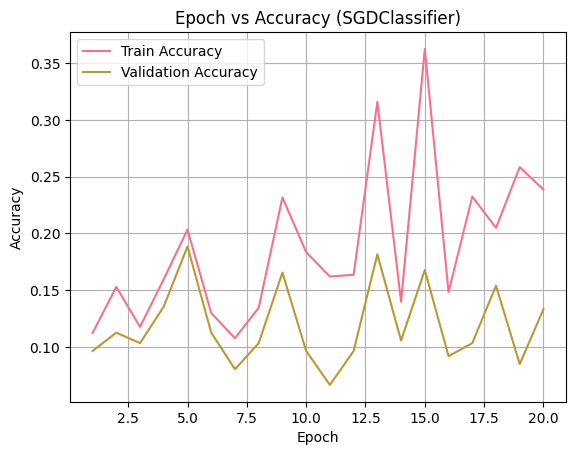

In [13]:
plt.plot(range(1, epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch vs Accuracy (SGDClassifier)")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
# === Random Forest ===
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)
print("RF Accuracy:", accuracy_score(y_test, pred_rf))
print(classification_report(y_test, pred_rf))

RF Accuracy: 0.2413793103448276
              precision    recall  f1-score   support

           0       0.31      0.70      0.43        43
           1       0.23      0.53      0.32        43
           2       0.21      0.37      0.27        38
           3       0.36      0.57      0.44        28
           4       0.10      0.14      0.11        29
           5       0.16      0.11      0.13        27
           6       0.41      0.43      0.42        21
           7       0.29      0.12      0.17        17
           8       0.20      0.12      0.15        16
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         9
          14       0.50      0.12      0.20         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00      

In [15]:
# === SVM ===
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm = SVC(kernel='rbf')
svm.fit(X_train_scaled, y_train)
pred_svm = svm.predict(X_test_scaled)
print("SVM Accuracy:", accuracy_score(y_test, pred_svm))
print(classification_report(y_test, pred_svm))

SVM Accuracy: 0.2367816091954023
              precision    recall  f1-score   support

           0       0.28      0.84      0.42        43
           1       0.22      0.65      0.33        43
           2       0.18      0.32      0.23        38
           3       0.33      0.46      0.39        28
           4       0.13      0.14      0.14        29
           5       0.15      0.15      0.15        27
           6       0.55      0.29      0.38        21
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00     

In [28]:
# === KNN ===

knn = KNeighborsClassifier(n_neighbors=39)
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)

print("KNN Accuracy:", accuracy_score(y_test, pred_knn))
print(classification_report(y_test, pred_knn))

KNN Accuracy: 0.17471264367816092
              precision    recall  f1-score   support

           0       0.19      0.77      0.31        43
           1       0.22      0.30      0.25        43
           2       0.11      0.21      0.14        38
           3       0.30      0.29      0.29        28
           4       0.10      0.21      0.14        29
           5       0.08      0.04      0.05        27
           6       0.29      0.24      0.26        21
           7       0.50      0.12      0.19        17
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         9
          14       0.00      0.00      0.00         8
          15       0.00      0.00      0.00         8
          16       0.00      0.00      0.00    

In [29]:
# === Naive Bayes ===
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, pred_nb))
print(classification_report(y_test, pred_nb))

Naive Bayes Accuracy: 0.04597701149425287
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.50      0.02      0.04        43
           2       0.00      0.00      0.00        38
           3       0.08      0.04      0.05        28
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        21
           7       0.00      0.00      0.00        17
           8       0.00      0.00      0.00        16
           9       0.00      0.00      0.00        15
          10       0.00      0.00      0.00        12
          11       0.00      0.00      0.00        11
          12       0.00      0.00      0.00        11
          13       0.04      0.33      0.08         9
          14       0.10      0.75      0.18         8
          15       0.12      0.12      0.12         8
          16       0.00      0.00      

In [30]:
# === Decision Tree ===
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, pred_dt))
print(classification_report(y_test, pred_dt))


Decision Tree Accuracy: 0.13333333333333333
              precision    recall  f1-score   support

           0       0.38      0.35      0.36        43
           1       0.23      0.26      0.24        43
           2       0.07      0.08      0.08        38
           3       0.21      0.29      0.24        28
           4       0.04      0.03      0.04        29
           5       0.04      0.04      0.04        27
           6       0.22      0.19      0.21        21
           7       0.08      0.06      0.07        17
           8       0.17      0.19      0.18        16
           9       0.11      0.13      0.12        15
          10       0.13      0.17      0.15        12
          11       0.09      0.09      0.09        11
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         9
          14       0.12      0.12      0.12         8
          15       0.17      0.12      0.14         8
          16       0.10      0.12    